# Clasificación y Regresión para tipo espectral estelar y predicción de variables estelares

### Carla Piñol Galera

## **Introducción**

El estudio de las estrellas ha sido una fascinación constante para la humanidad a lo largo de la historia. La astronomía moderna ha avanzado enormemente en nuestra comprensión de estas entidades celestiales, gracias en gran parte al análisis de datos recopilados de observaciones astronómicas. En este trabajo, nos centraremos en el análisis de un conjunto de datos que contiene información sobre estrellas.

Este análisis no solo nos permitirá comprender mejor las propiedades intrínsecas de las estrellas, sino que también puede tener aplicaciones prácticas en campos como la astrofísica y la cosmología. Por ejemplo, comprender las relaciones entre la masa, el radio y la temperatura efectiva de las estrellas puede ayudarnos a clasificarlas y comprender mejor su evolución y comportamiento.

La clasificación espectral de las estrellas es un sistema utilizado por los astrónomos para categorizar y organizar las estrellas en función de las características de su luz. La luz que emite una estrella contiene información crucial sobre su composición química, temperatura y otros aspectos importantes de su naturaleza.

Cuando observamos la luz de una estrella a través de un prisma o un espectrógrafo, vemos un espectro de colores con líneas y bandas oscuras y brillantes en diferentes partes del espectro. Estas líneas y bandas son características de los elementos químicos presentes en la atmósfera de la estrella y nos proporcionan información sobre su temperatura y otras propiedades.

La mayoría de las estrellas están actualmente clasificadas bajo el sistema de Morgan–Keenan (MK) que utiliza una letra y un número para designar cada tipo de estrella. Las letras van de O a M, siendo O las estrellas más calientes y M las más frías. Dentro de cada letra, hay subcategorías numéricas que indican con más detalle las características espectrales de la estrella. Además, en el sistema MK, se añade una clase de luminosidad a la clase espectral usando números romanos.

Por ejemplo, una estrella de tipo espectral "O" es muy caliente y brillante, con un espectro dominado por líneas de hidrógeno ionizado y helio. Por otro lado, una estrella de tipo espectral "M" es más fría y tenue, con líneas de elementos como el calcio y el magnesio en su espectro.

En resumen, la clasificación espectral de las estrellas es un sistema que nos permite organizar y entender mejor la diversidad de las estrellas en el universo, basándonos en las características de su luz y su composición química.


Los objetivos que se plantean en este trabajo son los siguientes:

* Utilizar modelos de clasificación para predecir el tipo espectral principal de las estrellas basándonos en sus características como masa, radio y temperatura efectiva.

* Evaluar y comparar el rendimiento de varios clasificadores en términos de precisión para determinar el modelo más efectivo en la clasificación espectral.

* Aplicar técnicas de regresión para predecir el número dentro del tipo espectral de las estrellas utilizando otras características como entrada.

* Evaluar la precisión de los modelos de regresión mediante métricas como el error cuadrático medio (MSE) o el coeficiente de determinación (R^2) y comparar su desempeño para identificar el modelo más adecuado para la variable a predecir.

## **Recopilación y Preparación de Datos:**

* Obtención del dataset
* Características con las que nos quedamos y explicación de cada una de ellas
* Exploración de datos
* Limpieza de datos y preparación del dataset


El dataset se ha obtenido de NASA Exoplanet Archive, se trata de un conjunto de datos que la comunidad de exoplanetas ha recopilado en varias listas de posibles objetivos para futuras misiones de imagen directa de exoplanetas.

Enlace: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=mission_exocat


Veamos la forma que tiene y qué información nos proporciona.

In [ ]:
import pandas as pd



data = pd.read_csv('/content/PSCompPars_2024.04.21_04.42.08.csv', skiprows=88, sep=",", decimal=".")
data


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5608,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5609,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5610,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [ ]:
# Obtener los nombres de las columnas
print("Nombres de las columnas:")
data.columns

Nombres de las columnas:


Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

Hay muchas columnas, nos quedamos con aquellas que nos van a servir para obtener el tipo espectral de la estrella. Los principales parámetros que definen un modelo estelar, además de la composición química, son la masa, el radio y la luminosidad. Como los dos últimos guardan relación con la temperatura efectiva, esta también la vamos a tomar como uno de los parámetros.

Para ello definimos una variable, ``aux0``, que recoja las columnas deseadas.

* ``pl_name``: Nombre del planeta
* ``st_teff``: Temperatura efectiva estelar [K]
* ``st_rad``: Radio de la estrella [Radio Solar]
* ``st_mass``: Masa de la estrella [Masa Solar]
* ``st_met``: Metalicidad estelar [dex]
* ``sy_vmag``: Magnitud V (Johnson)
* ``sy_kmag``: Magnitud Ks (2MASS)
* ``sy_gaiamag``: Magnitud Gaia

In [ ]:
aux0 = data[['pl_name', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'sy_vmag', 'sy_kmag', 'sy_gaiamag', 'st_spectype']]
aux0

,pl_name,st_teff,st_rad,st_mass,st_met,sy_vmag,sy_kmag,sy_gaiamag,st_spectype
0,11 Com b,4874.00,13.76,2.09,-0.260,4.72307,2.282,4.44038,G8 III
1,11 UMi b,4213.00,29.79,2.78,-0.020,5.01300,1.939,4.56216,K4 III
2,14 And b,4888.00,11.55,1.78,-0.210,5.23133,2.331,4.91781,K0 III
3,14 Her b,5338.00,0.93,0.91,0.405,6.61935,4.714,6.38300,K0 V
4,16 Cyg B b,5750.00,1.13,1.08,0.060,6.21500,4.651,6.06428,G3 V
...,...,...,...,...,...,...,...,...,...
5607,ups And b,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8 V
5608,ups And c,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8 V
5609,ups And d,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8 V
5610,ups Leo b,4836.00,11.22,1.48,-0.200,4.30490,2.184,4.03040,G9 III


Una vez tenemos la parte del dataset que nos interesa hay que preparar los datos. Creamos una nueva columna ``st_spectype_cut`` que recoja el tipo espectral desechando la parte que representa la luminosidad en números romanos.


In [ ]:
aux0['st_spectype'] = aux0['st_spectype'].str.split().str[0]
aux0['st_spectype'] = aux0['st_spectype'].astype(str)
aux0['st_spectype_cut'] = aux0['st_spectype'].apply(lambda x: x[:2])


<ipython-input-4-ec1cdd461049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype'] = aux0['st_spectype'].str.split().str[0]
<ipython-input-4-ec1cdd461049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype'] = aux0['st_spectype'].astype(str)
<ipython-input-4-ec1cdd461049>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Si observamos los valores que tenemos para la nueva columna vemos que hay algunos que no son correctos, estos los eliminaremos más adelante. Un caso particular es el valor ``m3`` que lo sustituimos por ``M3``.

In [ ]:
aux0['st_spectype_cut'].unique()

array(['G8', 'K4', 'K0', 'G3', 'K3', 'G6', 'K7', 'M', 'M5', 'M3', 'M6',
       'M8', 'na', 'F6', 'K1', 'G0', 'G1', 'F0', 'G5', 'K2', 'F8', 'M1',
       'K5', 'G', 'M9', 'F9', 'G2', 'G9', 'F3', 'L1', 'M0', 'F5', 'M7',
       'M4', 'M2', 'F2', 'G4', 'K', 'F7', 'F4', 'F', 'G7', 'A8', 'B9',
       'K9', 'Be', 'K6', 'A2', 'A5', 'M(', 'A', 'B', 'm3', 'A7', 'WD',
       'Am', 'K8', 'sd', 'F1', 'A1', 'DQ', 'T8', 'B2'], dtype=object)

In [ ]:
aux0['st_spectype_cut'] = aux0['st_spectype_cut'].replace('m3', 'M3')

<ipython-input-6-53a80d8daeed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype_cut'] = aux0['st_spectype_cut'].replace('m3', 'M3')


Veamos cuantos valores hay de cada uno:

In [ ]:
conteo_valores = aux0['st_spectype_cut'].value_counts()
columna = 'st_spectype_cut'
print(f"Valores distintos en la columna '{columna}': {len(conteo_valores)}\n")
print(conteo_valores.to_string())

Valores distintos en la columna 'st_spectype_cut': 62

st_spectype_cut
na    3587
K0     179
G5     136
G0     114
M0      99
M1      93
K2      92
G8      91
F8      76
G2      73
M2      67
K1      66
M3      66
G3      64
K3      60
G9      60
M4      50
G       47
K       43
K7      40
K4      39
G6      38
F9      38
G4      37
K5      36
F7      36
G1      35
F6      34
M       30
F       26
F5      25
G7      22
M5      19
K6      14
A5       8
F4       6
A8       6
M7       6
B9       5
K8       4
M6       4
F3       4
M(       4
F2       3
F0       3
K9       3
F1       2
A        2
WD       2
B        2
B2       2
A2       2
M8       2
M9       2
A7       1
Be       1
Am       1
sd       1
A1       1
DQ       1
T8       1
L1       1


Lo que se observa es que hay una gran cantidad de nulos ('na') y varios que no son válidos, pues solo contamos con el tipo espectral de la letra, nos falta la otra parte (el número).

Para hacer la calsificación vamos a dividir la clase espectral en dos columnas, una que almacene la letra (categoría principal) como ``st_spectype_l``, y otra el número (subcategoría) como ``st_spectype_n``.

In [ ]:
aux0['st_spectype_l'] = aux0['st_spectype_cut'].str[0]
aux0['st_spectype_n'] = aux0['st_spectype_cut'].str[1]

<ipython-input-8-e0d1fe94f522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype_l'] = aux0['st_spectype_cut'].str[0]
<ipython-input-8-e0d1fe94f522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype_n'] = aux0['st_spectype_cut'].str[1]


A continuación creamos una nueva columna ``st_spectype_ord`` que asigna un número a cada tipo espectral a modo de escala, va desde 0 para el más caliente O0 y hasta el 69 para el más frío M9.

In [ ]:
# Definir el orden de los tipos espectrales de mayor a menor
orden_tipos_espectrales = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Definir el orden de los números de mayor a menor
orden_numeros = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

# Crear un diccionario para asignar un número a cada tipo espectral según su orden
asignacion_numeros = {}
contador = 0
for letra in orden_tipos_espectrales:
    for numero in orden_numeros:
        asignacion_numeros[letra + numero] = contador
        contador += 1

# Aplicar la asignación de números al DataFrame
aux0['st_spectype_ord'] = aux0['st_spectype_cut'].map(asignacion_numeros)

<ipython-input-9-4994e62d344b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux0['st_spectype_ord'] = aux0['st_spectype_cut'].map(asignacion_numeros)


Una vez estructurados los datos podemos ver cierta información del dataframe, como que contamos con datos numéricos a excepción del nombre del planeta y las columnas correspondientes al tipo espectral que son nuestras etiquetas a predecir.

In [ ]:
aux0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5612 non-null   object 
 1   st_teff          5387 non-null   float64
 2   st_rad           5366 non-null   float64
 3   st_mass          5608 non-null   float64
 4   st_met           5173 non-null   float64
 5   sy_vmag          5387 non-null   float64
 6   sy_kmag          5392 non-null   float64
 7   sy_gaiamag       5336 non-null   float64
 8   st_spectype      5612 non-null   object 
 9   st_spectype_cut  5612 non-null   object 
 10  st_spectype_l    5612 non-null   object 
 11  st_spectype_n    5462 non-null   object 
 12  st_spectype_ord  1863 non-null   float64
dtypes: float64(8), object(5)
memory usage: 570.1+ KB


Para terminar con el preprocesamiento de datos vamos a hacer limpieza de nulos, y observamos que de la cantidad inicial de sentencias de las que partimos nos quedamos con menos de la mitad, a pesar de ello son suficientes para realizar nuestro análisis.

In [ ]:
print('Cantidad de filas sin limpiar nulls: ',len(aux0))
aux0 = aux0.dropna()
print('Cantidad de filas tras limpiar nulls: ',len(aux0))

Cantidad de filas sin limpiar nulls:  5612
Cantidad de filas tras limpiar nulls:  1733


Podemos ver la distribución de los datos, la mayoría de estrellas son de tipo G, mientras que sólo tenemos 3 instancias de tipo B. Incluso hay un tipo espectral, el O, del que no tenemos ninguna instancia.

In [ ]:
print(aux0['st_spectype_l'].value_counts())


st_spectype_l
G    658
K    499
M    339
F    219
A     15
B      3
Name: count, dtype: int64


## **Clasificación**

* Qué vamos a clasificar
* Modelos de clasificación y explicación cada uno
* Observación de los resultados

Vamos a aplicar diferentes modelos de clasificación con el fin de predecir el tipo espectral principal (la letra).

Todos los métodos utilizados son algoritmos de aprendizaje automático supervisado para la clasificación.

* SVC(C=1, kernel='rbf', probability=True)

  El SVC funciona encontrando el hiperplano óptimo que separa las clases en el espacio de características. Este hiperplano es aquel que maximiza el margen entre las clases, donde el margen es la distancia perpendicular desde el hiperplano a los puntos más cercanos de cada clase, también conocidos como vectores de soporte.

  Los parámetros que definimos son C, que controla el balance entre obtener un margen más grande y clasificar correctamente los puntos de entrenamiento, cuanto mayor sea este parámetro más flexible es la clasificación. Si elegimos un C muy bajo podemos tener sobreajuste de los datos. El kernerl especifica la función que se utiliza para separar las clases, elegimos el que viene por defecto que se ajusta mejor al problema que tenemos, las alternativas son un kernel lineal o uno polinomial.

* MultinomialNB(alpha=1)

  Se basa en el teorema de Bayes y hace suposiciones "ingenuas" (naive) sobre la independencia condicional de las características dadas las clases. El parámetro que ajustamos es alpha, parámetro de suavizado de Laplace (también conocido como suavizado de adición) que se utiliza para evitar la probabilidad cero de ciertas características dadas una clase. Un valor más alto de alpha resulta en un suavizado más fuerte, lo que puede ayudar a mejorar el rendimiento del modelo al reducir el efecto de sobreajuste. Tras probar con varios valores, el que mejor resultado obtiene es ````alpha=2````, conforme aumentamos su valor disminuye el accuracy en entrenamiento, y cuanto menor es su valor mejor se ajusta a los datos train.

* Logistic Regression(C=1)

  La regresión logística modela la probabilidad de que una instancia pertenezca a una clase utilizando una función logística.  La regresión logística puede ser regularizada para evitar el sobreajuste, vamos a utilizar la regularización L2 que tiene un parámetro asociado C para controlar la fuerza de la regularización. Al igual que en modelo SVC un valor más bajo de  C implica una regularización más fuerte, tras probar varios valores elegimos ````C=1````.

* KNeighbors(n_neighbors=5)

  El funcionamiento básico de KNeighbors es simple: dada una instancia de prueba, encuentra las k instancias de entrenamiento más cercanas a ella en términos de distancia, y luego asigna a la instancia de prueba la clase que es más común entre esas k instancias de entrenamiento cercanas. El número de vecinos que escogemos es ````n_neighbors=5````, tras probar con varios valores no se observa mejora.

* Decision Tree(max_depth=10)

  Un árbol de decisión es una estructura de árbol en la que cada nodo interno representa una característica (atributo), cada rama representa el resultado de una prueba sobre esa característica, y cada hoja representa la etiqueta de clase o el valor numérico que se predice. Es importante determinar el número de ramas máximas, si no el árbol creará las necesarias para clasificar cada una de las instancias de entrenamiento prefectamente y tendremos sobreajuste. Para ello hay que determinar el hiperparámetro ````max_depth````.


* MLP(hidden_layer_sizes=(200,), alpha=0.01, early_stopping=True,learning_rate='adaptive')

  Es un clasificador basado en redes neuronales artificiales, es una arquitectura específica de red neuronal que consta de múltiples capas de neuronas, incluidas una capa de entrada, una o más capas ocultas y una capa de salida. Los parámetros que ajustamos son el número de neuronas en cada capa oculta ````hidden_layer_sizes=(200,)````,  el parámetro de regularización que controla la cantidad de penalización aplicada a los pesos de la red para evitar el sobreajuste ````alpha=0.01````, con ````learning_rate='adaptive'```` el resultado mejora ligeramente, y por último un parámetro muy importante de ajustar es ````early_stopping=True```` ya que si no especifica el modelo se ajusta con un 100% de accuracy a los datos de entrenamiento y tenemos overfitting.

Vamos a predecir en primer lugar el tipo espectral total, compuesto por letra y número, es decir, la etiqueta ``st_spectype_cut``.

In [ ]:
labels = aux0['st_spectype_cut']
aux = aux0.drop(columns=['pl_name', 'st_spectype', 'st_spectype_cut', 'st_spectype_l', 'st_spectype_n', 'st_spectype_ord'])

In [ ]:
aux

,st_teff,st_rad,st_mass,st_met,sy_vmag,sy_kmag,sy_gaiamag
0,4874.00,13.76,2.09,-0.260,4.72307,2.282,4.44038
1,4213.00,29.79,2.78,-0.020,5.01300,1.939,4.56216
2,4888.00,11.55,1.78,-0.210,5.23133,2.331,4.91781
3,5338.00,0.93,0.91,0.405,6.61935,4.714,6.38300
4,5750.00,1.13,1.08,0.060,6.21500,4.651,6.06428
...,...,...,...,...,...,...,...
5607,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687
5608,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687
5609,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687
5610,4836.00,11.22,1.48,-0.200,4.30490,2.184,4.03040


Aplicamos los clasificadores SVC, LogisticRegression, MLP, KNeighbors y MultinomialNB:

In [ ]:
# Todos los clasificadores con escalador MinMaxScaler()
!pip install scikit-learn
#Import for LogisticRegression
from sklearn.linear_model import LogisticRegression
# import para SVC
from sklearn.svm import SVC
# import para MLP
from sklearn.neural_network import MLPClassifier
# import para KNeighbors
from sklearn.neighbors import KNeighborsClassifier
# import para MultinomialNB
from sklearn.naive_bayes import MultinomialNB
#import for apply crossvalidation
from sklearn.model_selection import KFold
#import scaler
from sklearn.preprocessing import MinMaxScaler
# import para la métrica precission
from sklearn.metrics import precision_score
import numpy as np


#Escalamos los datos
scaler = MinMaxScaler()
aux = pd.DataFrame(scaler.fit_transform(aux), columns=aux.columns)

#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
print(cv)
#Para cada fold
#Variable acumuladora
mean_score = 0.0

#Modelos que vamos a utilizar
modelos = [SVC(kernel="poly"),
           LogisticRegression(C=1),
           #MLPClassifier(hidden_layer_sizes=(200,), alpha=0.01, early_stopping=True,learning_rate='adaptive', max_iter=500,
            #             tol=1e-4,random_state=42),
           KNeighborsClassifier(n_neighbors=5),
           MultinomialNB(alpha=1)]

nombres_modelos = ['SVC', 'Logistic Regression', 'MLP', 'KNeighbors', 'MultinomialNB']
nombres_modelos = ['SVC', 'Logistic Regression', 'KNeighbors', 'MultinomialNB']

resultados = np.zeros(len(modelos))
accuracies = np.zeros((len(modelos),5))
for i in range(len(modelos)):
  mean_score = np.zeros(len(modelos))
  cont = 0
  print(f"\nModelo: {nombres_modelos[i]}")
  for train_index, test_index in cv.split(aux):
      #Seleccionamos los datos
      x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
      x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]
      #Declaramos modelo
      model = modelos[i]
      model.fit(x_train, y_train)
      mean_score[i] = mean_score[i] + model.score(x_test,y_test)
      accuracies[i,cont] = model.score(x_test,y_test)
      cont += 1

  #Obtenemos la media de los resultados
  resultado = np.round(mean_score[i]/5,2)
  resultados[i] = resultado


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.9 MB/s eta 0:00:00
KFold(n_splits=5, random_state=50, shuffle=True)

Modelo: SVC

Modelo: Logistic Regression

Modelo: KNeighbors

Modelo: MultinomialNB


In [ ]:
df = pd.DataFrame({'Accuracy 1': accuracies[:,0], 'Accuracy 2': accuracies[:,1], 'Accuracy 3': accuracies[:,2],
                  'Accuracy 4': accuracies[:,3], 'Accuracy 5': accuracies[:,4], 'Cross validation': resultados}, index=nombres_modelos)
df


,Accuracy 1,Accuracy 2,Accuracy 3,Accuracy 4,Accuracy 5,Cross validation
SVC,0.365994,0.305476,0.314121,0.300578,0.335260,0.32
Logistic Regression,0.158501,0.138329,0.167147,0.161850,0.135838,0.15
KNeighbors,0.377522,0.305476,0.403458,0.355491,0.341040,0.36
MultinomialNB,0.092219,0.106628,0.103746,0.121387,0.078035,0.10


In [ ]:
print('Número de clases según tipo espectral: ',len(aux0['st_spectype_cut'].unique()))

Número de clases según tipo espectral:  44


Los resultados que obtenemos no son muy buenos, ninguno de los clasificadores consigue ajustarse. El mayor porcentaje de accuracy se consigue con el KNeighbors y el SVC. El número de clases a predecir son muchas, no tenemos los suficientes datos para entrenar los modelos y obtener buenos resultados.

Veamos si mejoramos los resultados al predecir únicamente la categoría espectral principal (la letra), es decir, la etiqueta ``st_spectype_l``.

In [ ]:
labels = aux0['st_spectype_l']
aux = aux0.drop(columns=['pl_name', 'st_spectype', 'st_spectype_cut', 'st_spectype_l', 'st_spectype_n', 'st_spectype_ord'])

In [ ]:
# Contar valores NaN por columna
nan_count = aux.isnull().sum()
total_nan = nan_count.sum()

# Contar valores infinitos por columna
inf_count = np.isinf(aux.values).sum()
# Mostrar resultados
print(f"Valores NaN por columna:\n{nan_count[nan_count > 0]}\n")
print(f"Total de valores NaN: {total_nan}")
print(f"Total de valores infinitos: {inf_count}")

Valores NaN por columna:
Series([], dtype: int64)

Total de valores NaN: 0
Total de valores infinitos: 0


In [ ]:
# Todos los clasificadores con escalador MinMaxScaler()

#Import for LogisticRegression
from sklearn.linear_model import LogisticRegression
# import para SVC
from sklearn.svm import SVC
# import para MLP
from sklearn.neural_network import MLPClassifier
# import para KNeighbors
from sklearn.neighbors import KNeighborsClassifier
# import para MultinomialNB
from sklearn.naive_bayes import MultinomialNB
#import for apply crossvalidation
from sklearn.model_selection import KFold
#import scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# import para la métrica precission
from sklearn.metrics import precision_score
import numpy as np
# Importar la métrica para la matriz de confusión
from sklearn.metrics import confusion_matrix



#Escalamos los datos
scaler = MinMaxScaler()
aux = pd.DataFrame(scaler.fit_transform(aux), columns=aux.columns)

#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
print(cv)
#Variable acumuladora
mean_score = 0.0
# Crear una lista para almacenar las matrices de confusión
matrices_confusion = []
#Modelos que vamos a utilizar
modelos = [SVC(kernel="poly"),
           LogisticRegression(C=1),
          # MLPClassifier(hidden_layer_sizes=(200,), alpha=0.01, early_stopping=True,learning_rate='adaptive'),
           KNeighborsClassifier(n_neighbors=5),
           MultinomialNB(alpha=1)]

nombres_modelos = ['SVC', 'Logistic Regression', 'MLP', 'KNeighbors', 'MultinomialNB']
nombres_modelos = ['SVC', 'Logistic Regression', 'KNeighbors', 'MultinomialNB']

resultados = np.zeros(len(modelos))
accuracies = np.zeros((len(modelos),5))
coeficientes = np.zeros((len(modelos),5))
for i in range(len(modelos)):
  mean_score = np.zeros(len(modelos))
  cont = 0
  for train_index, test_index in cv.split(aux):
      #Seleccionamos los datos
      x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
      x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]
      #Declaramos modelo
      model = modelos[i]
      model.fit(x_train, y_train)
      # Predecimos las etiquetas
      y_pred = model.predict(x_test)
      # Calculamos la matriz de confusión
      cm = confusion_matrix(y_test, y_pred)
      matrices_confusion.append(cm)
      # Mostramos la matriz de confusión para cada fold
      #print(f"Fold {cont + 1}:\n{cm}\n")
      # Guardamos las métricas
      mean_score[i] = mean_score[i] + model.score(x_test,y_test)
      accuracies[i,cont] = model.score(x_test,y_test)
      cont += 1

  #Obtenemos la media de los resultados
  resultado = np.round(mean_score[i]/5,2)
  resultados[i] = resultado


KFold(n_splits=5, random_state=50, shuffle=True)


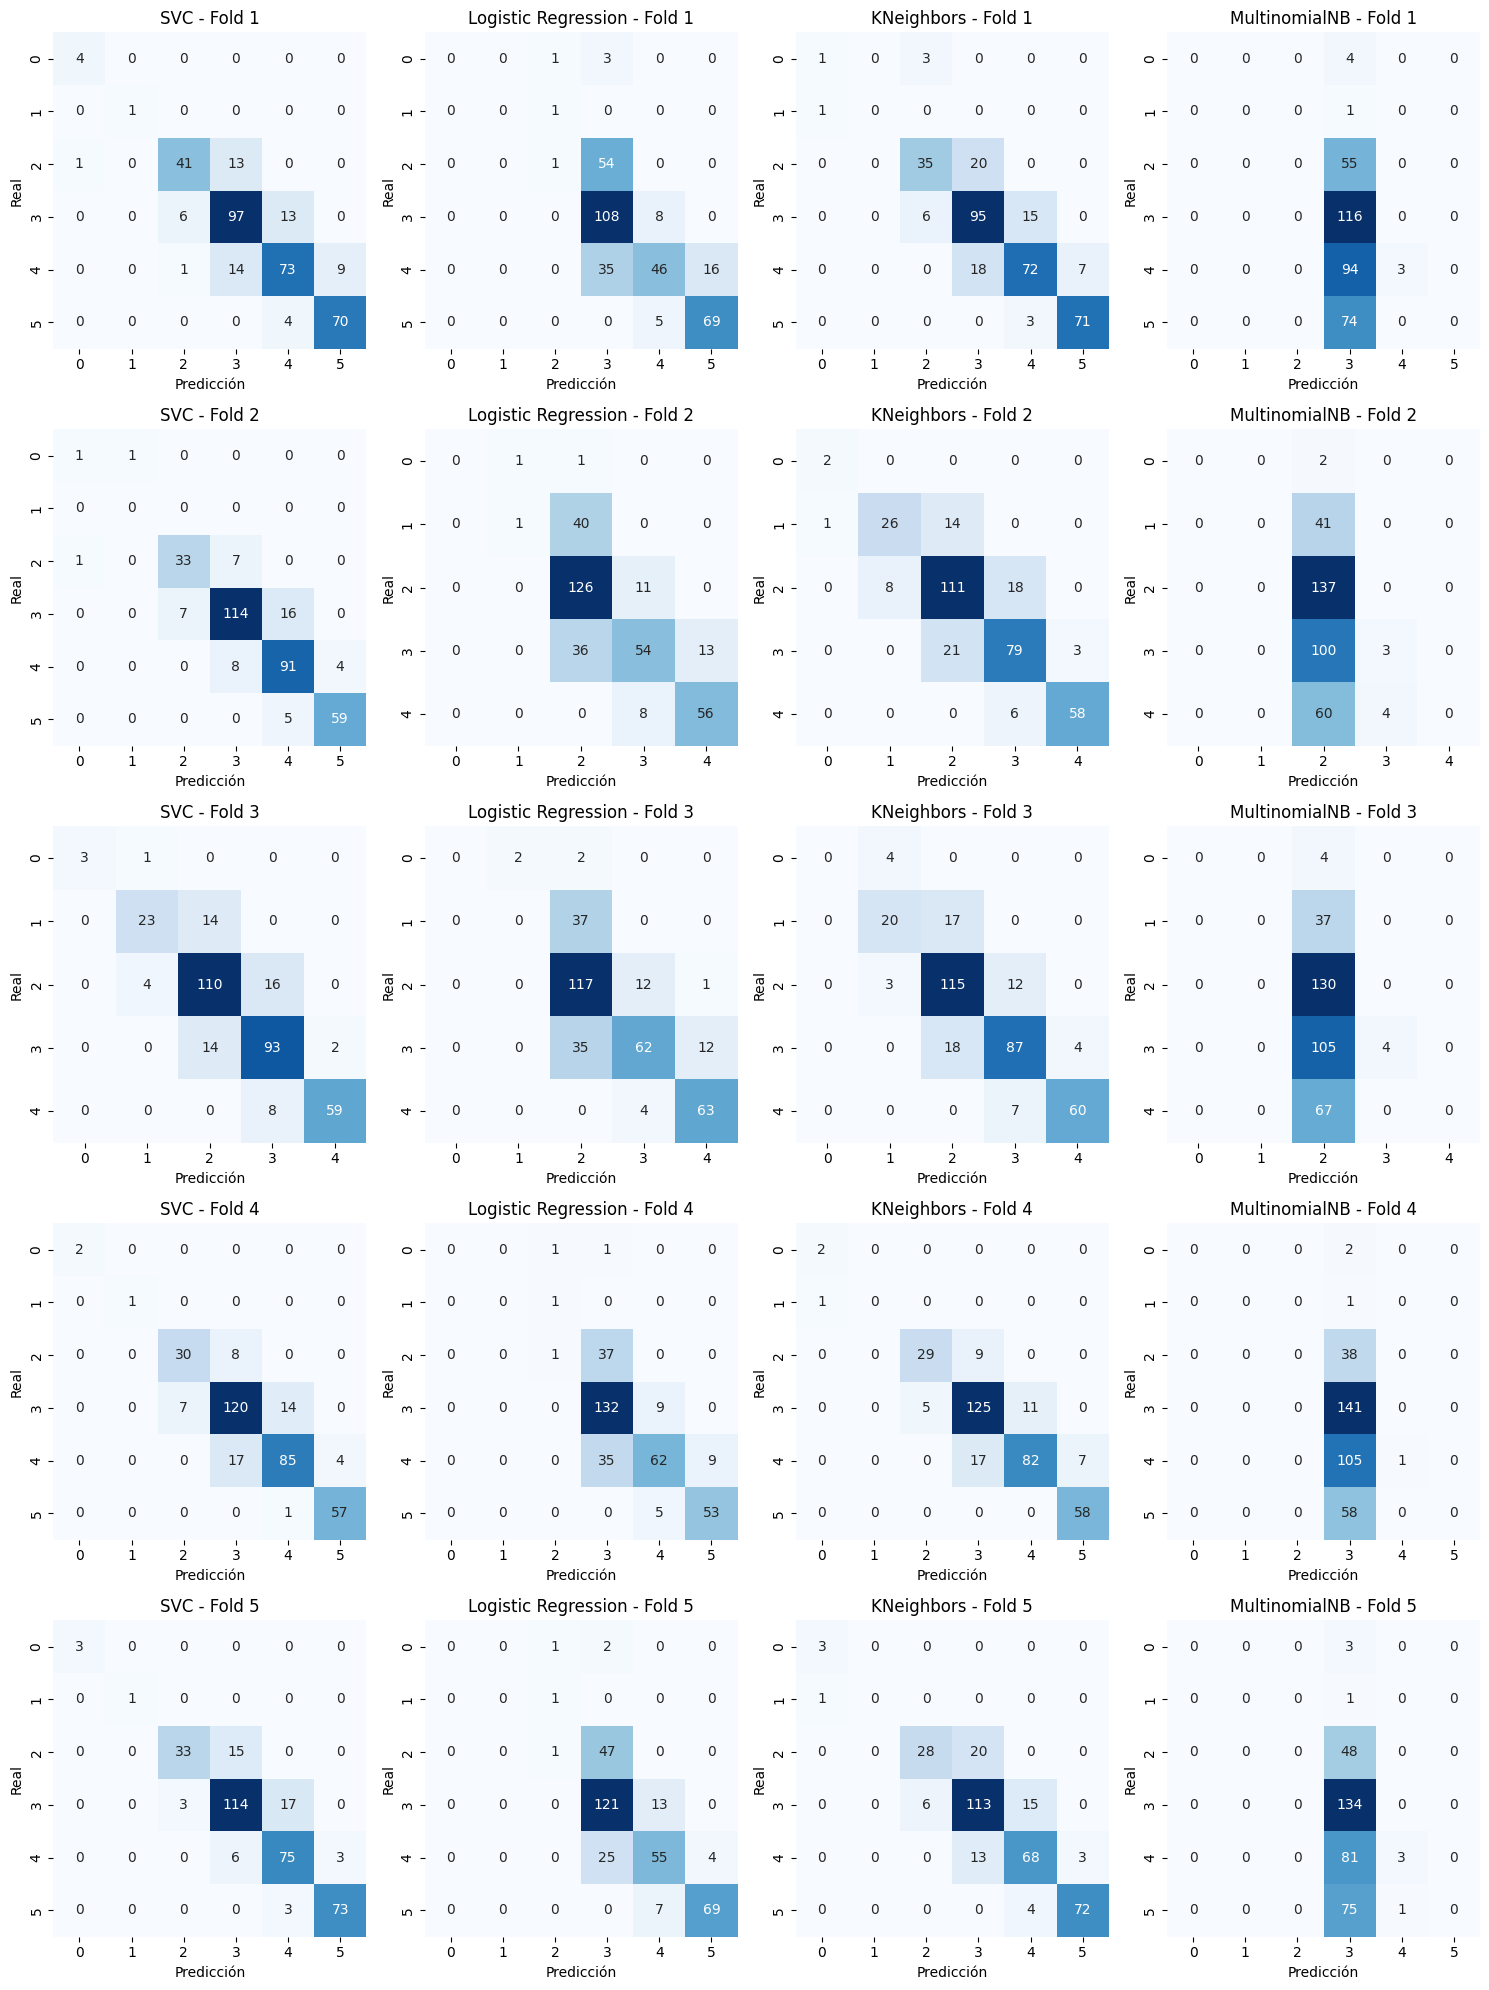

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes una lista llamada `matrices_confusion` que contiene las matrices de confusión

# Crear la figura y los subplots (5 subgráficas por modelo)
fig, axes = plt.subplots(nrows=5, ncols=len(nombres_modelos), figsize=(15, 20))

# Iterar sobre los modelos
for i in range(len(nombres_modelos)):
    # Obtener la matriz de confusión para cada modelo
    for j in range(5):  # 5 folds
        cm = matrices_confusion[i*5 + j]

        # Visualizar la matriz de confusión
        ax = axes[j, i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        # Ajustes
        ax.set_title(f"{nombres_modelos[i]} - Fold {j+1}")
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

# Ajustar la presentación de los subplots
plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame({'Accuracy 1': accuracies[:,0], 'Accuracy 2': accuracies[:,1], 'Accuracy 3': accuracies[:,2],
                  'Accuracy 4': accuracies[:,3], 'Accuracy 5': accuracies[:,4], 'Cross validation': resultados}, index=nombres_modelos)
df


,Accuracy 1,Accuracy 2,Accuracy 3,Accuracy 4,Accuracy 5,Cross validation
SVC,0.824207,0.858790,0.829971,0.852601,0.864162,0.85
Logistic Regression,0.645533,0.682997,0.697406,0.716763,0.710983,0.69
KNeighbors,0.789625,0.795389,0.812680,0.855491,0.820809,0.81
MultinomialNB,0.342939,0.403458,0.386167,0.410405,0.395954,0.39


En este caso los resultados obtenidos mejoran considerablemente, el número de clases a predecir disminuye y hay más datos para una misma clase.

De nuevo el mejor clasificador resulta ser el SVC con un 85%, seguido del KNeighbors con un 81%. El peor resulta ser el MultinomialNB que se queda en un 39%.

A continuación vamos a repetir las clasificaciones utilizando otro escalador, ``RobustScaler()``.

In [ ]:
# Todos los clasificadores con escalador RobustScaler()

#Import for LogisticRegression
from sklearn.linear_model import LogisticRegression
# import para SVC
from sklearn.svm import SVC
# import para MLP
from sklearn.neural_network import MLPClassifier
# import para KNeighbors
from sklearn.neighbors import KNeighborsClassifier
# import para MultinomialNB
from sklearn.naive_bayes import MultinomialNB
#import for apply crossvalidation
from sklearn.model_selection import KFold
#import scaler
from sklearn.preprocessing import RobustScaler
# import para la métrica precission
from sklearn.metrics import precision_score
import numpy as np
# Importar la métrica para la matriz de confusión
from sklearn.metrics import confusion_matrix



#Escalamos los datos
scaler = RobustScaler()
aux = pd.DataFrame(scaler.fit_transform(aux), columns=aux.columns)

#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Para cada fold
#Variable acumuladora
mean_score = 0.0
# Crear una lista para almacenar las matrices de confusión
matrices_confusion = []
#Modelos que vamos a utilizar
modelos = [SVC(kernel="poly"),
           LogisticRegression(C=1),
           #MLPClassifier(hidden_layer_sizes=(200,), alpha=0.01, early_stopping=True,learning_rate='adaptive'),
           KNeighborsClassifier(n_neighbors=5)
           ]

nombres_modelos = ['SVC', 'Logistic Regression', 'MLP', 'KNeighbors']
nombres_modelos = ['SVC', 'Logistic Regression', 'KNeighbors']

resultados = np.zeros(len(modelos))
accuracies = np.zeros((len(modelos),5))
coeficientes = np.zeros((len(modelos),5))
for i in range(len(modelos)):
  mean_score = np.zeros(len(modelos))
  cont = 0
  for train_index, test_index in cv.split(aux):
      #Seleccionamos los datos
      x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
      x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]
      #Declaramos modelo
      model = modelos[i]
      model.fit(x_train, y_train)
      # Predecimos las etiquetas
      y_pred = model.predict(x_test)
      # Calculamos la matriz de confusión
      cm = confusion_matrix(y_test, y_pred)
      matrices_confusion.append(cm)
      mean_score[i] = mean_score[i] + model.score(x_test,y_test)
      accuracies[i,cont] = model.score(x_test,y_test)
      cont += 1

  #Obtenemos la media de los resultados
  resultado = np.round(mean_score[i]/5,2)
  resultados[i] = resultado


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

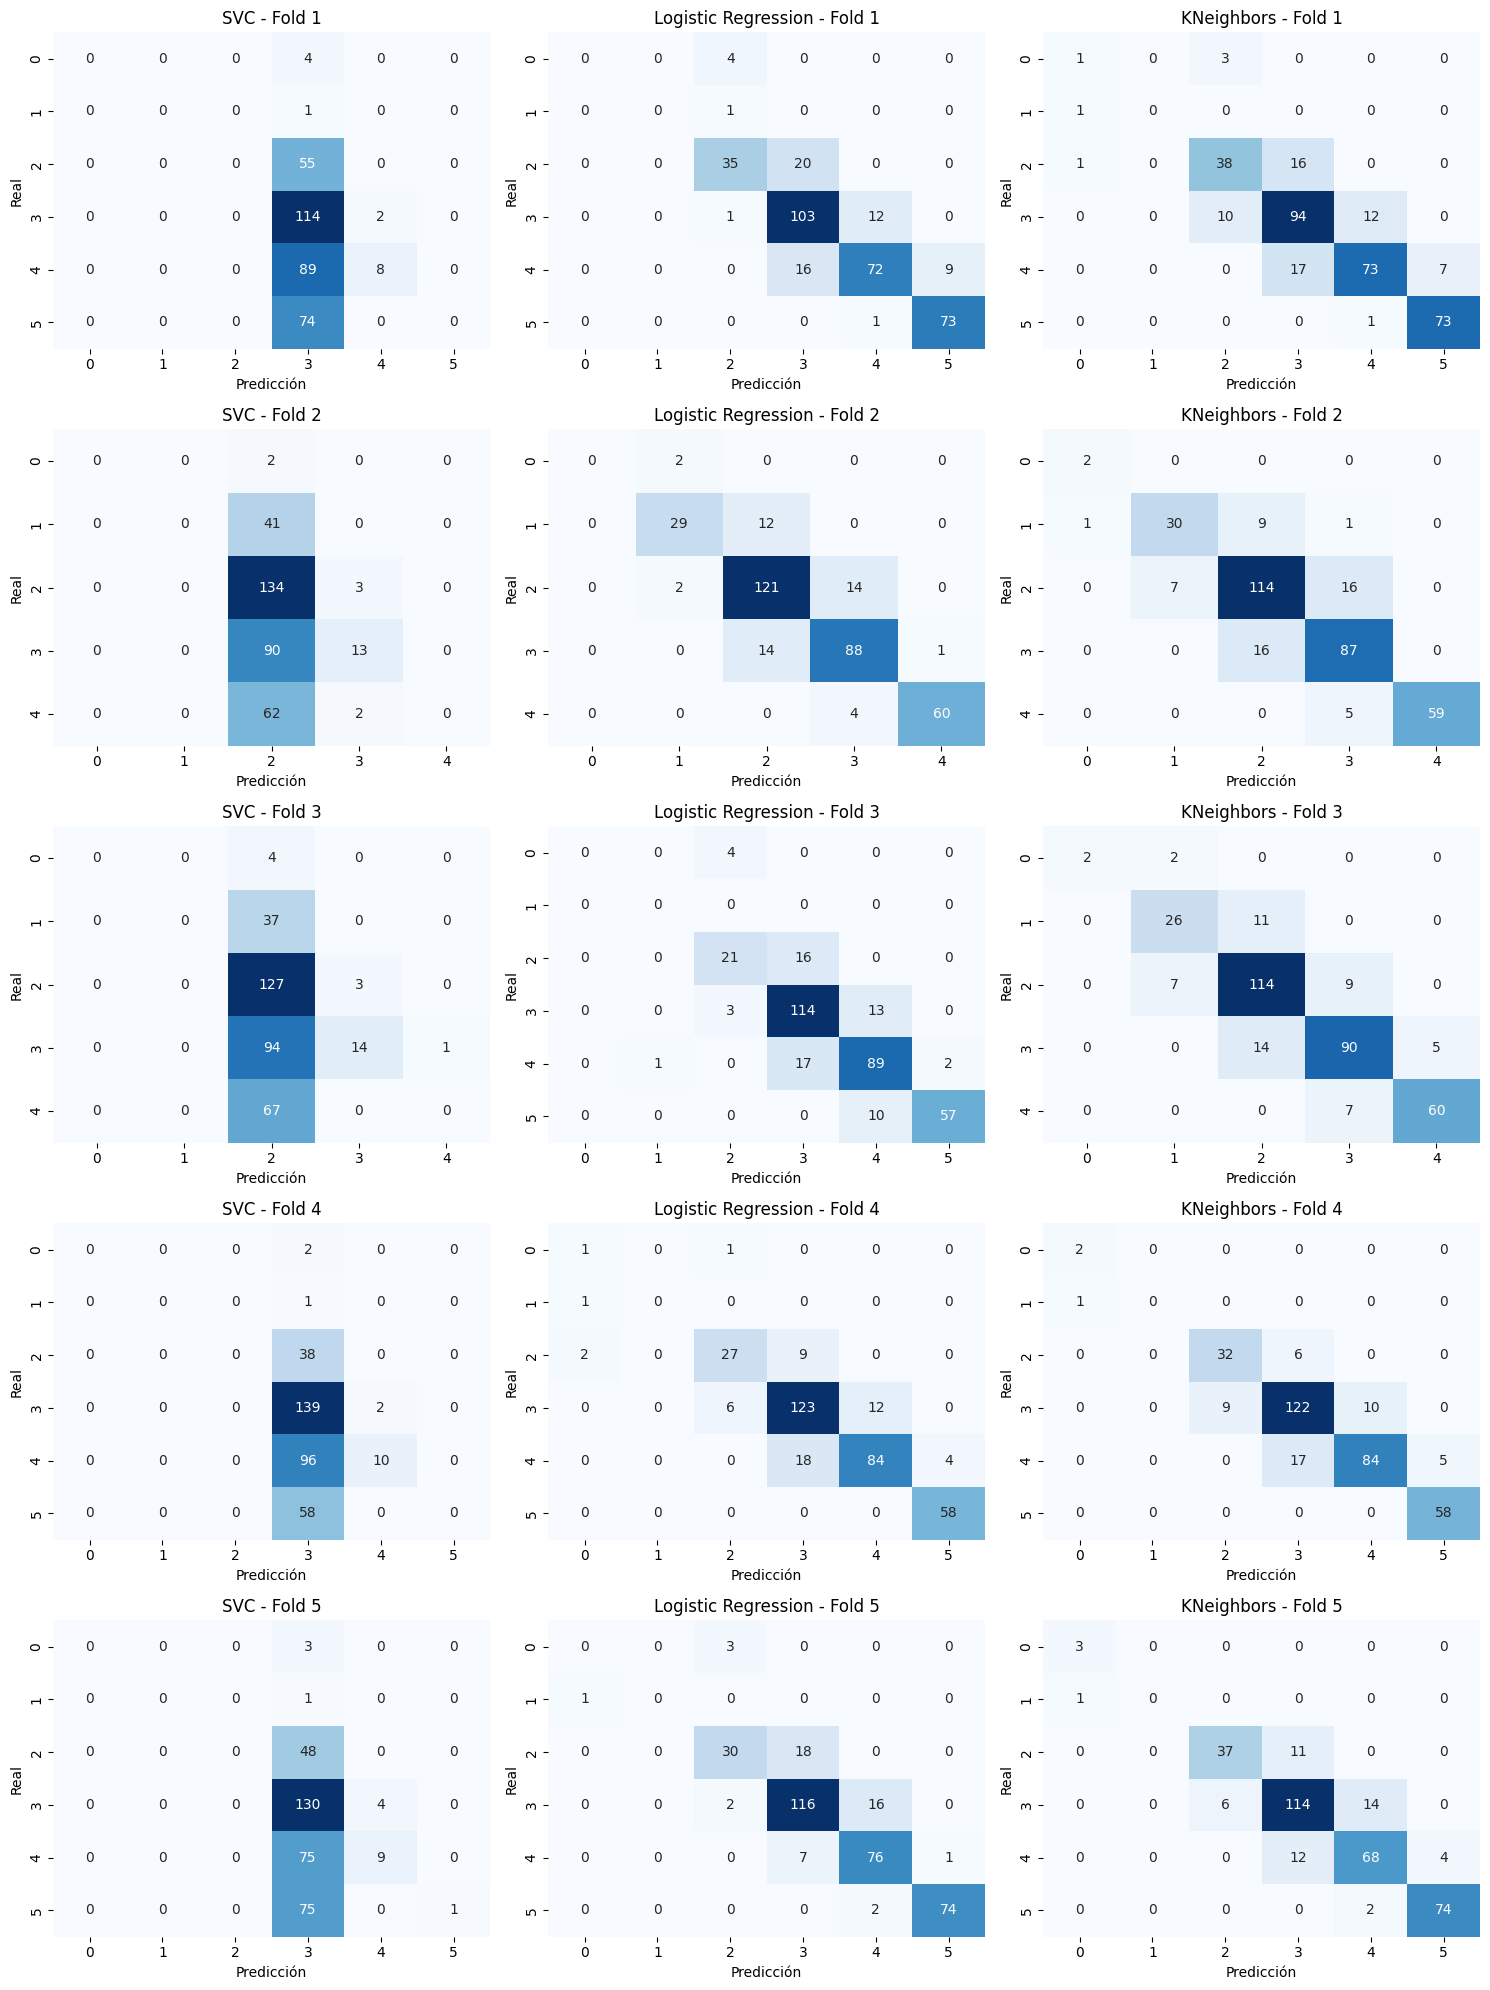

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes una lista llamada `matrices_confusion` que contiene las matrices de confusión

# Crear la figura y los subplots (5 subgráficas por modelo)
fig, axes = plt.subplots(nrows=5, ncols=len(nombres_modelos), figsize=(15, 20))

# Iterar sobre los modelos
for i in range(len(nombres_modelos)):
    # Obtener la matriz de confusión para cada modelo
    for j in range(5):  # 5 folds
        cm = matrices_confusion[i*5 + j]

        # Visualizar la matriz de confusión
        ax = axes[j, i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        # Ajustes
        ax.set_title(f"{nombres_modelos[i]} - Fold {j+1}")
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

# Ajustar la presentación de los subplots
plt.tight_layout()

In [ ]:
df = pd.DataFrame({'Accuracy 1': accuracies[:,0], 'Accuracy 2': accuracies[:,1], 'Accuracy 3': accuracies[:,2],
                  'Accuracy 4': accuracies[:,3], 'Accuracy 5': accuracies[:,4], 'Cross validation': resultados}, index=nombres_modelos)
df


,Accuracy 1,Accuracy 2,Accuracy 3,Accuracy 4,Accuracy 5,Cross validation
SVC,0.351585,0.423631,0.406340,0.430636,0.404624,0.40
Logistic Regression,0.815562,0.858790,0.809798,0.846821,0.855491,0.84
KNeighbors,0.804035,0.841499,0.841499,0.861272,0.855491,0.84


Con el escalador ``RobustScaler()`` se obtienen mejores resultados para todos ellos, a excepción del SVC que ha reducido su accuracy al 40%, menos de la mitad. Llama la atención ya que utilizando el escalador ``MinMaxScaler()`` era el que mejor predicciones tenía. Por otro lado, los clasificadores restantes que se basan en la distancia, obtienen resultados parejos, superando el 80% de accuracy. Veamos que si cambiamos el kernel del SVC a lineal (``kernel='linear'``) obtenemos mejores resultados:

In [ ]:
#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Para cada fold
#Variable acumuladora
mean_score = 0.0
# Crear una lista para almacenar las matrices de confusión
matrices_confusion = []
#Modelos que vamos a utilizar
modelos = [SVC(kernel="linear")
           ]

nombres_modelos = ['SVC (lineal)']

resultados = np.zeros(len(modelos))
accuracies = np.zeros((len(modelos),5))
coeficientes = np.zeros((len(modelos),5))
for i in range(len(modelos)):
  mean_score = np.zeros(len(modelos))
  cont = 0
  for train_index, test_index in cv.split(aux):
      #print("TRAIN:", train_index, "TEST:", test_index)
      #Seleccionamos los datos
      x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
      x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]
      #Declaramos modelo
      model = modelos[i]
      model.fit(x_train, y_train)
      # Predecimos las etiquetas
      y_pred = model.predict(x_test)
      # Calculamos la matriz de confusión
      cm = confusion_matrix(y_test, y_pred)
      matrices_confusion.append(cm)
      mean_score[i] = mean_score[i] + model.score(x_test,y_test)
      accuracies[i,cont] = model.score(x_test,y_test)
      cont += 1

  #Obtenemos la media de los resultados
  resultado = np.round(mean_score[i]/5,2)
  resultados[i] = resultado


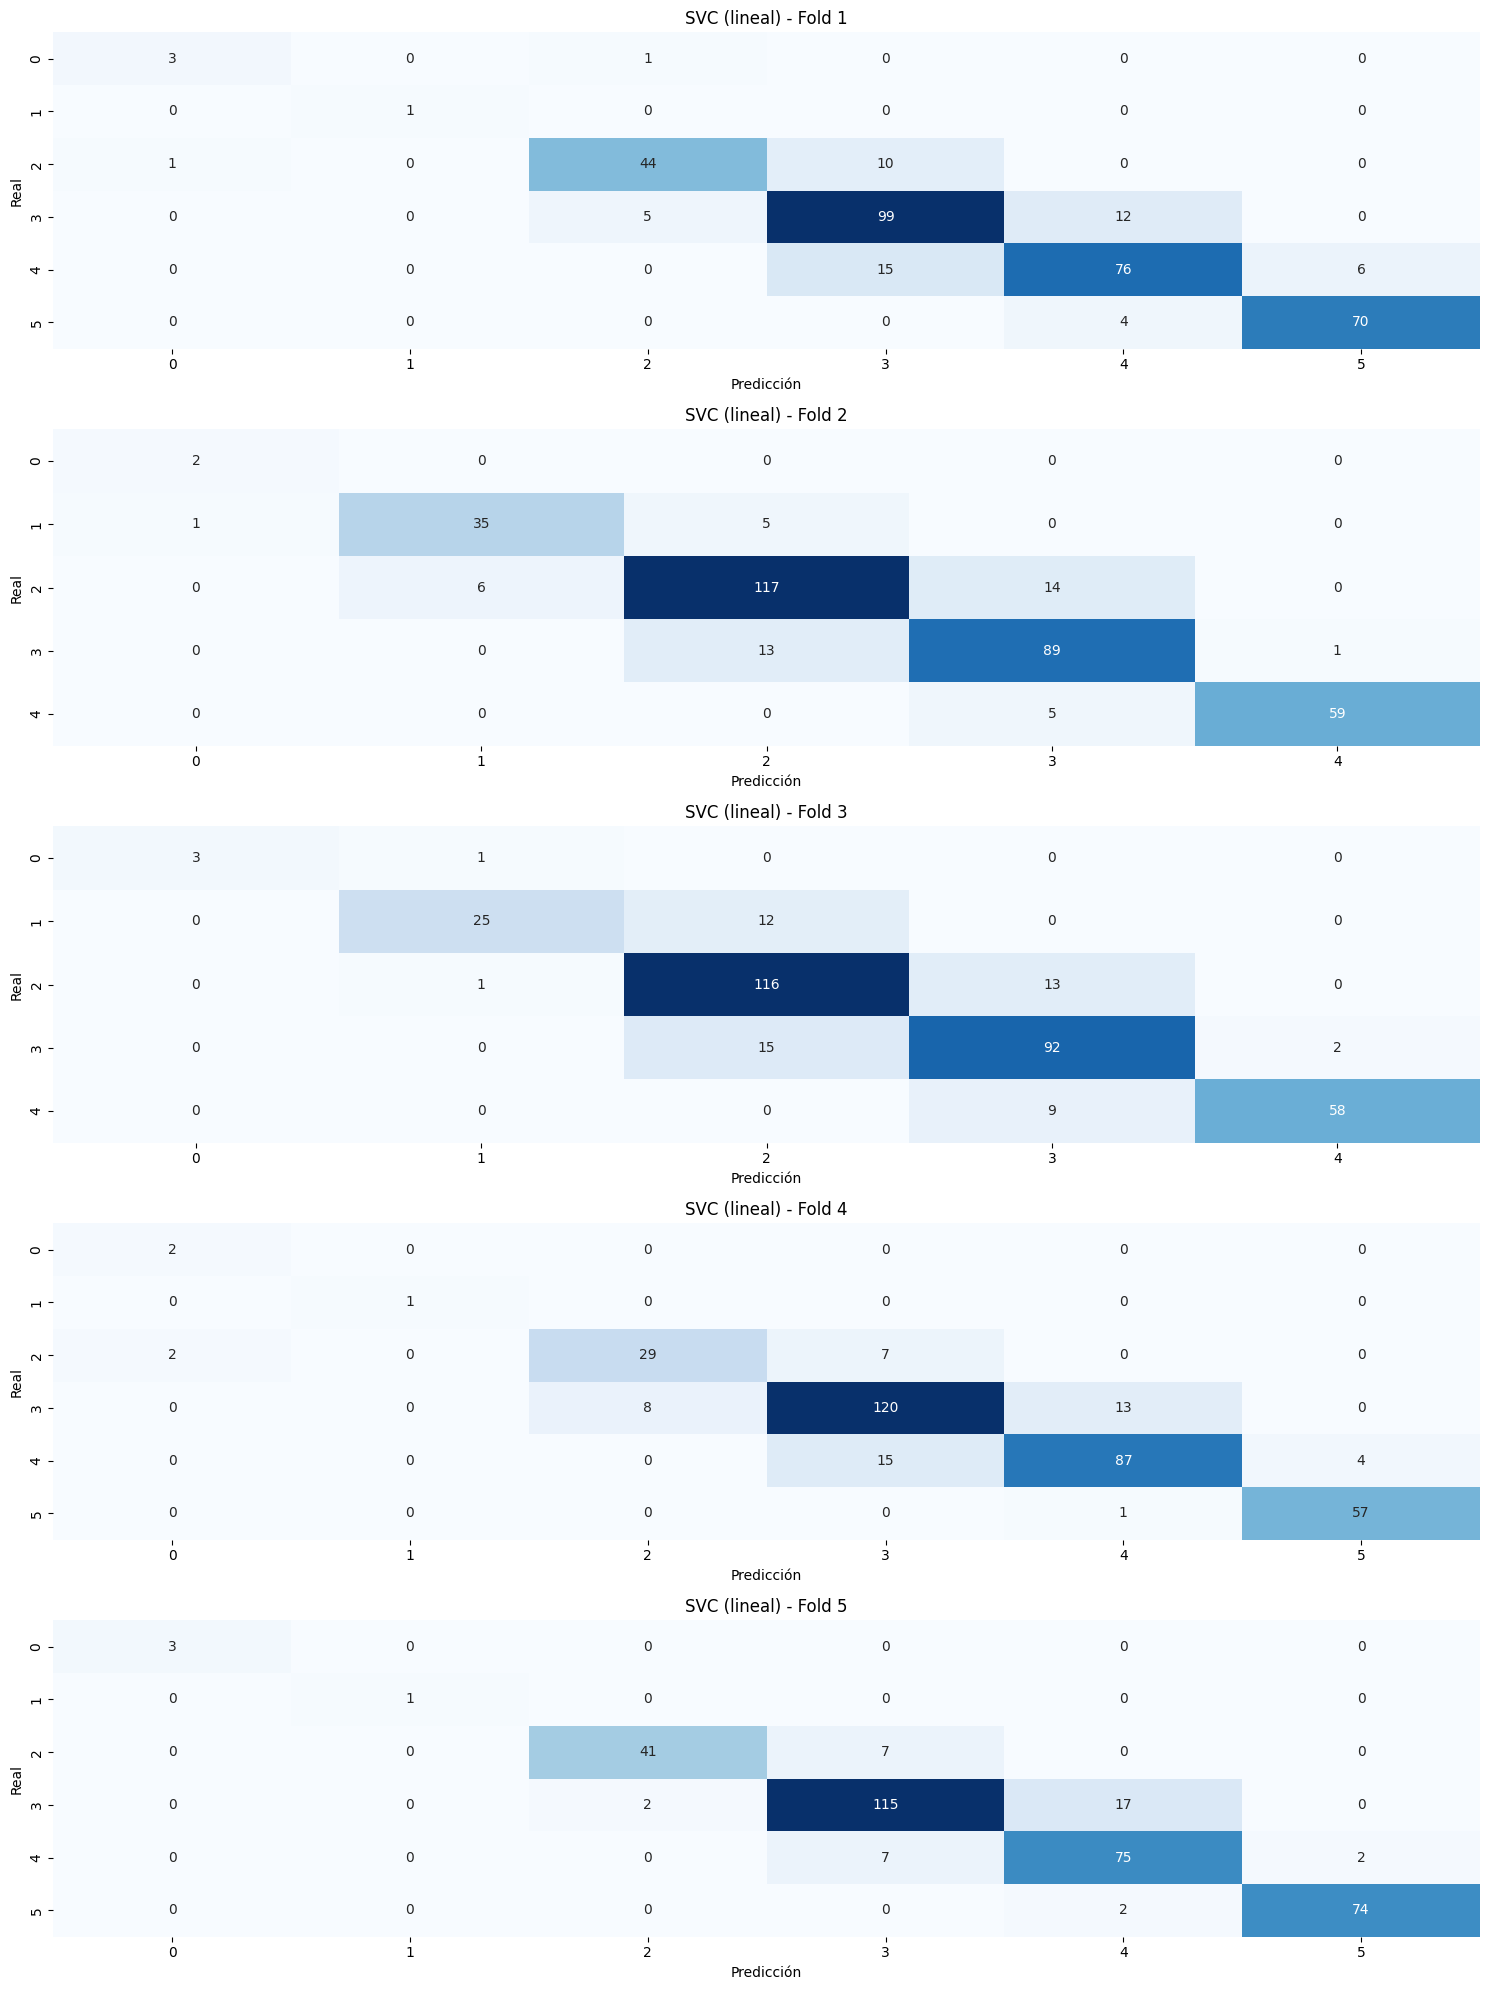

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes una lista llamada `matrices_confusion` que contiene las matrices de confusión

# Crear la figura y los subplots (5 subgráficas por modelo)
fig, axes = plt.subplots(nrows=5, ncols=len(nombres_modelos), figsize=(15, 20))

for j in range(5):  # 5 folds
    cm = matrices_confusion[j]

    # Visualizar la matriz de confusión
    ax = axes[j]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

    # Ajustes
    ax.set_title(f"{nombres_modelos[i]} - Fold {j+1}")
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

# Ajustar la presentación de los subplots
plt.tight_layout()

In [ ]:
df = pd.DataFrame({'Accuracy 1': accuracies[:,0], 'Accuracy 2': accuracies[:,1], 'Accuracy 3': accuracies[:,2],
                  'Accuracy 4': accuracies[:,3], 'Accuracy 5': accuracies[:,4], 'Cross validation': resultados}, index=nombres_modelos)
df

,Accuracy 1,Accuracy 2,Accuracy 3,Accuracy 4,Accuracy 5,Cross validation
SVC (lineal),0.84438,0.870317,0.847262,0.855491,0.893064,0.86


Este es el que mejor accuracy obtiene de los modelos probados, al utilizar una función lineal para separar las clases mejora la predicción.

#### Árboles de decisión

Otro modelo que podemos utilizar para predecir las etiquetas mediante calsificación son los árboles de decisión. Nos vamos a centrar en el algoritmo de DecisionTree, y vamos a realizar varias pruebas.

Primero definimos las variables para almacenar los resultados.

In [ ]:
nombres_modelos = ['DC MinMaxScaler', 'DC RobustScaler', 'DC limitless', 'DC 5 niveles']

resultados = np.zeros(4)
accuracies = np.zeros((4,5))

# Crear una lista para almacenar las matrices de confusión
matrices_confusion = []

Y a continuación realizamos las diferentes pruebas: DecissionTree con MinMaxScaler, DecissionTree con RobustScaler, DecissionTree sin escalador, DecissionTree con límite y sin escalador.

In [ ]:
# DecissionTree con MinMaxScaler

# import para DecissionTree
from sklearn.tree import DecisionTreeClassifier
#import for apply crossvalidation
from sklearn.model_selection import KFold
#import scaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score


#Escalamos los datos
scaler = MinMaxScaler()
aux = pd.DataFrame(scaler.fit_transform(aux), columns=aux.columns)

#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Variable acumuladora
mean_score = 0.0
cont = 0
for train_index, test_index in cv.split(aux):
    #Seleccionamos los datos
    x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
    x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]

    #Declaramos modelo
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    # Predecimos las etiquetas
    y_pred = model.predict(x_test)
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    matrices_confusion.append(cm)
    mean_score = mean_score + model.score(x_test,y_test)
    accuracies[0,cont] = model.score(x_test,y_test)
    cont += 1

#Obtenemos la media de los resultados
resultado = np.round(mean_score/5,2)
resultados[0] = resultado

In [ ]:
# DecissionTree con RobustScaler

# import para DecissionTree
from sklearn.tree import DecisionTreeClassifier
#import for apply crossvalidation
from sklearn.model_selection import KFold
#import scaler
from sklearn.preprocessing import RobustScaler
# import para la métrica precission
from sklearn.metrics import precision_score


#Escalamos los datos
scaler = RobustScaler()
aux = pd.DataFrame(scaler.fit_transform(aux), columns=aux.columns)

#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Variable acumuladora
mean_score = 0.0
cont = 0
for train_index, test_index in cv.split(aux):
    #Seleccionamos los datos
    x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
    x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]

    #Declaramos modelo
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    # Predecimos las etiquetas
    y_pred = model.predict(x_test)
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    matrices_confusion.append(cm)
    mean_score = mean_score + model.score(x_test,y_test)
    accuracies[1,cont] = model.score(x_test,y_test)
    cont += 1

#Obtenemos la media de los resultados
resultado = np.round(mean_score/5,2)
resultados[1] = resultado

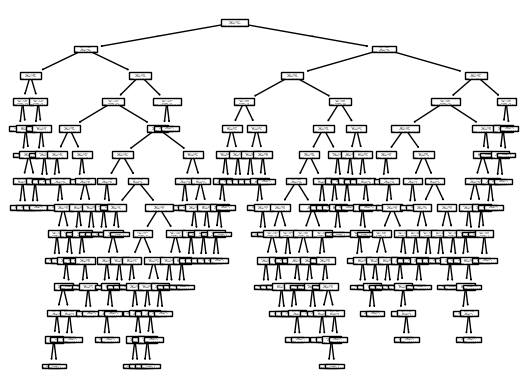

In [ ]:
# DecissionTree sin escalador sin límite

# import para DecissionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#import for apply crossvalidation
from sklearn.model_selection import KFold
# import para la métrica precission
from sklearn.metrics import precision_score


#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Variable acumuladora
mean_score = 0.0
cont = 0
for train_index, test_index in cv.split(aux):
    #Seleccionamos los datos
    x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
    x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]

    #Declaramos modelo
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    # Predecimos las etiquetas
    y_pred = model.predict(x_test)
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    matrices_confusion.append(cm)
    mean_score = mean_score + model.score(x_test,y_test)
    accuracies[2,cont] = model.score(x_test,y_test)
    cont += 1

tree.plot_tree(model)

#Obtenemos la media de los resultados
resultado = np.round(mean_score/5,2)
resultados[2] = resultado

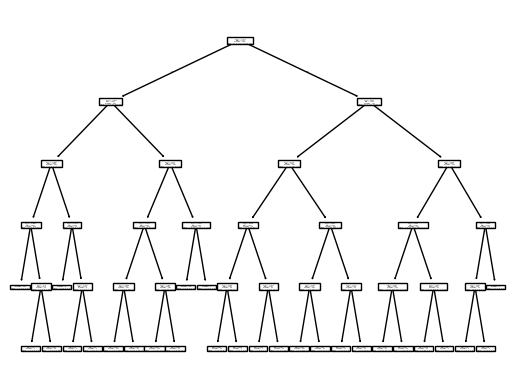

In [ ]:
# DecissionTree sin escalador con 5 niveles

# import para DecissionTree
from sklearn.tree import DecisionTreeClassifier
# Para dibujar el árbol
from sklearn import tree
#import for apply crossvalidation
from sklearn.model_selection import KFold
# import para la métrica precission
from sklearn.metrics import precision_score
# Para guardar el árbol con una resolución que se pueda ver
import matplotlib.pyplot as plt


#Declaramos cross validation
cv = KFold(n_splits=5, random_state=50, shuffle=True)
#Variable acumuladora
mean_score = 0.0
cont = 0
for train_index, test_index in cv.split(aux):
    #Seleccionamos los datos
    x_train, y_train = aux.iloc[train_index], labels.iloc[train_index]
    x_test, y_test = aux.iloc[test_index], labels.iloc[test_index]

    #Declaramos modelo
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(x_train, y_train)
    # Predecimos las etiquetas
    y_pred = model.predict(x_test)
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    matrices_confusion.append(cm)
    mean_score = mean_score + model.score(x_test,y_test)
    accuracies[3,cont] = model.score(x_test,y_test)
    cont += 1

tree.plot_tree(model)


# Con este código puedes guardar como un archivo PDF el dibujo del árbol
tree.plot_tree(model)

#Obtenemos la media de los resultados
resultado = np.round(mean_score/5,2)
resultados[3] = resultado

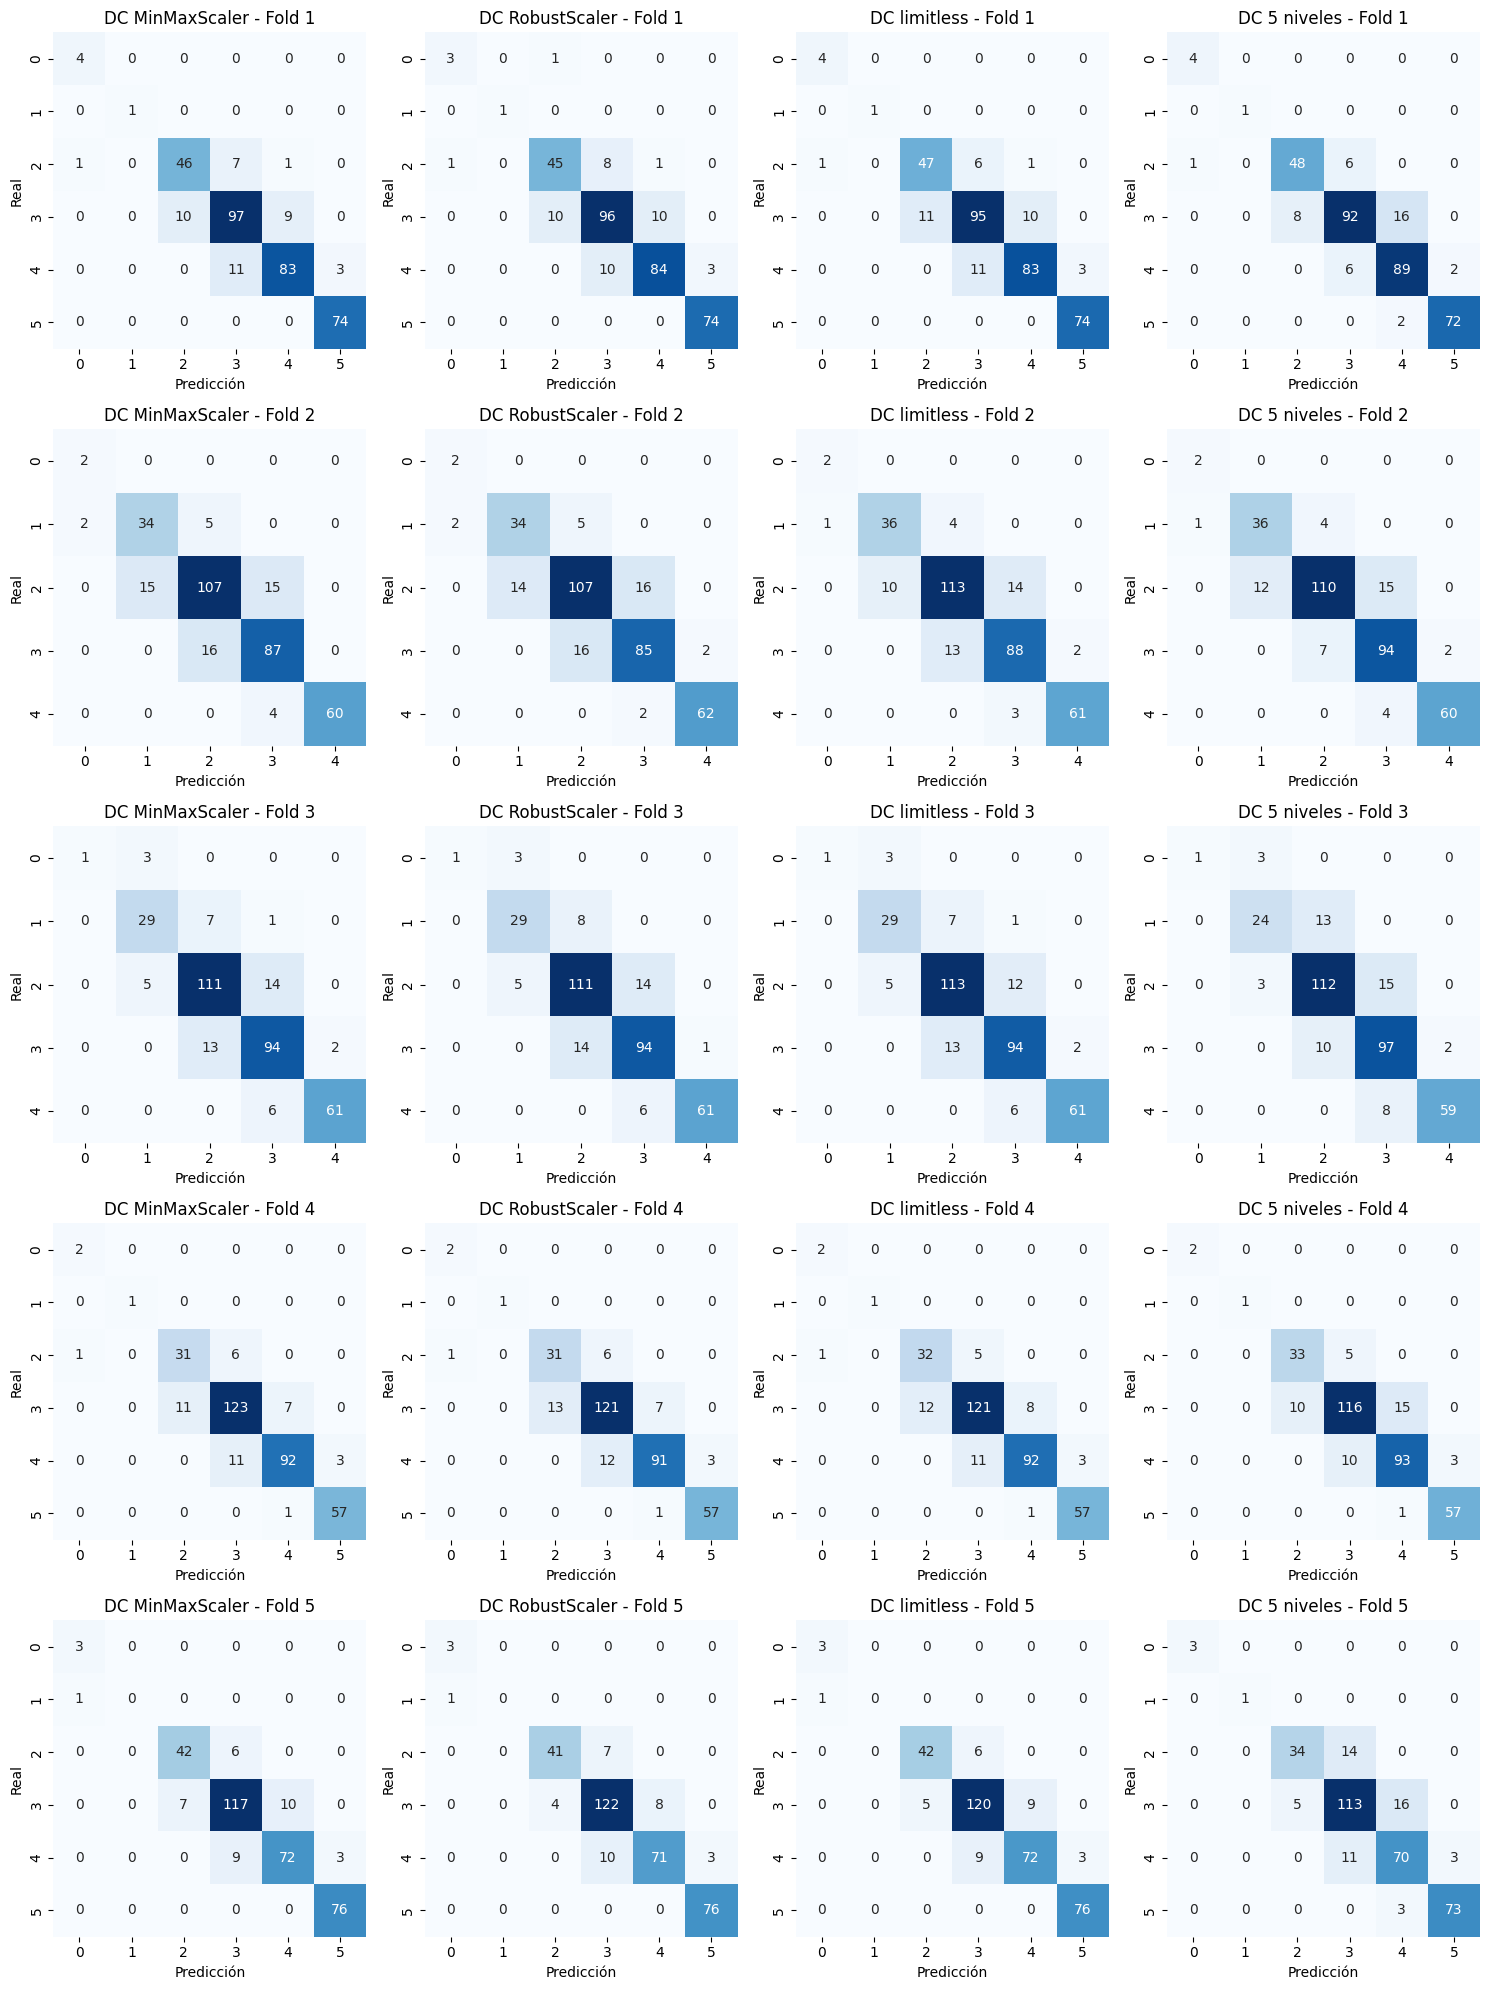

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes una lista llamada `matrices_confusion` que contiene las matrices de confusión

# Crear la figura y los subplots (5 subgráficas por modelo)
fig, axes = plt.subplots(nrows=5, ncols=len(nombres_modelos), figsize=(15, 20))

# Iterar sobre los modelos
for i in range(len(nombres_modelos)):
    # Obtener la matriz de confusión para cada modelo
    for j in range(5):  # 5 folds
        cm = matrices_confusion[i*5 + j]

        # Visualizar la matriz de confusión
        ax = axes[j, i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        # Ajustes
        ax.set_title(f"{nombres_modelos[i]} - Fold {j+1}")
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

# Ajustar la presentación de los subplots
plt.tight_layout()

In [ ]:
df = pd.DataFrame({'Accuracy 1': accuracies[:,0], 'Accuracy 2': accuracies[:,1], 'Accuracy 3': accuracies[:,2],
                  'Accuracy 4': accuracies[:,3], 'Accuracy 5': accuracies[:,4], 'Cross validation': resultados}, index=nombres_modelos)
df


,Accuracy 1,Accuracy 2,Accuracy 3,Accuracy 4,Accuracy 5,Cross validation
DC MinMaxScaler,0.878963,0.835735,0.853026,0.884393,0.895954,0.87
DC RobustScaler,0.873199,0.835735,0.853026,0.875723,0.904624,0.87
DC limitless,0.876081,0.864553,0.858790,0.881503,0.904624,0.88
DC 5 niveles,0.881844,0.870317,0.844380,0.872832,0.849711,0.86


Tras evaluar el modelo de clasificación DecisionTreeClassifier usando los escaladores MinMaxScaler y RobustScaler y sin usar ningún escalador, podemos concluir que apenas se puede aprecir diferencias entre usar un escalador u otro y no usarlo, pues las tasas de acierto y de error obtenidas son prácticamente idénticas. En cuanto al límite de niveles del árbol vemos que los resultados son prácticamente el mismo, por lo que es más eficiente definir un límite.

## **Regresión**

* Qué vamos a predecir
* Métodos de regresión y explicación cada uno
* Observación de los resultados

Lo primero que vamos a realizar en la división de datos de entrenamiento y de test. Para ello tenemos que adecuar el dataset utilizando ``get_dummies`` para convertir variables categóricas en variables indicadoras, en nuestro caso el tipo espectral principal, la letra. El objetivo es predecir el tipo espectral total conociendo el principal y el resto de características

In [ ]:
from sklearn.model_selection import train_test_split

aux0_mod = pd.get_dummies(aux0, drop_first=True, columns=["st_spectype_l"], dtype=float)

# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(aux0_mod[['st_mass', 'st_teff', 'st_rad', 'st_met', 'sy_vmag', 'sy_kmag',
                                                              'sy_gaiamag', 'st_spectype_l_B', 'st_spectype_l_F', 'st_spectype_l_G',
                                                              'st_spectype_l_K', 'st_spectype_l_M']],
                                                    aux0_mod['st_spectype_ord'], test_size=0.3, random_state=1)

In [ ]:
aux0_mod

,pl_name,st_teff,st_rad,st_mass,st_met,sy_vmag,sy_kmag,sy_gaiamag,st_spectype,st_spectype_cut,st_spectype_n,st_spectype_ord,st_spectype_l_B,st_spectype_l_F,st_spectype_l_G,st_spectype_l_K,st_spectype_l_M
0,11 Com b,4874.00,13.76,2.09,-0.260,4.72307,2.282,4.44038,G8,G8,8,48.0,0.0,0.0,1.0,0.0,0.0
1,11 UMi b,4213.00,29.79,2.78,-0.020,5.01300,1.939,4.56216,K4,K4,4,54.0,0.0,0.0,0.0,1.0,0.0
2,14 And b,4888.00,11.55,1.78,-0.210,5.23133,2.331,4.91781,K0,K0,0,50.0,0.0,0.0,0.0,1.0,0.0
3,14 Her b,5338.00,0.93,0.91,0.405,6.61935,4.714,6.38300,K0,K0,0,50.0,0.0,0.0,0.0,1.0,0.0
4,16 Cyg B b,5750.00,1.13,1.08,0.060,6.21500,4.651,6.06428,G3,G3,3,43.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,ups And b,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8,F8,8,38.0,0.0,1.0,0.0,0.0,0.0
5608,ups And c,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8,F8,8,38.0,0.0,1.0,0.0,0.0,0.0
5609,ups And d,6156.77,1.56,1.30,0.101,4.09565,2.859,3.98687,F8,F8,8,38.0,0.0,1.0,0.0,0.0,0.0
5610,ups Leo b,4836.00,11.22,1.48,-0.200,4.30490,2.184,4.03040,G9,G9,9,49.0,0.0,0.0,1.0,0.0,0.0


Modelos de regresión:

* DecisionTree Regressor:

  Es un modelo de regresión basado en árboles de decisión. A diferencia de la clasificación, donde el objetivo es predecir la clase de una instancia, la regresión tiene como objetivo predecir un valor numérico continuo

* KNeighborsRegressor:

  Es un modelo de regresión basado en vecinos más cercanos (KNN, por sus siglas en inglés) para problemas de regresión. Al igual que el clasificador KNeighbors (KNeighborsClassifier) para problemas de clasificación, KNeighborsRegressor utiliza una estrategia de aprendizaje basada en instancias, lo que significa que predice el valor de una instancia dada mirando las 'K' instancias más cercanas en el espacio de características y promediando sus valores de destino.

* SVR:

  Es un modelo de regresión basado en máquinas de vectores de soporte (SVM, por sus siglas en inglés) para problemas de regresión. Al igual que SVM para problemas de clasificación, SVR también utiliza vectores de soporte para construir un modelo de regresión.


In [ ]:
modelos = ['Decision Tree 1', 'Decision Tree 2', 'Decision Tree 3', 'KNeighbors', 'SVR']
best_accuracies = np.zeros((len(modelos)))

#### Decision Tree Regressor

Vamos a entrenar el decisionTreeRegressor con diferentes parámetros para encontrar el punto de overfitting y ver cuál es el valor óptimo, analizaremos ``max_depth`` (profundidad máxima del árbol), ``min_samples_split`` (número mínimo de muestras requeridas para dividir un nodo interno en dos nodos hijos) y ``min_samples_leaf`` ( número mínimo de muestras que debe tener un nodo hoja).

Empezamos con ``max_depth``.



In [ ]:
#Decision tree Regressor según max_depth

from sklearn.tree import DecisionTreeRegressor
#R2, MAE y MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


train_scores_r2, test_scores_r2 = [],[]
train_scores_mae, test_scores_mae = [],[]
train_scores_mse, test_scores_mse = [],[]


# Valores del parametro max_depth
values = [i for i in range(1, 21)]

accuracies = np.zeros(len(values))
cont = 0
# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = DecisionTreeRegressor(max_depth=i)

	# fit model
	model.fit(x_train, y_train)

	# evaluate on the train dataset
	train_predict = model.predict(x_train)
 	#R2
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores_r2.append(train_r2)
 	#MAE
	train_mae = round(mean_absolute_error(y_train,train_predict),3)
	train_scores_mae.append(train_mae)
	#MSE
	train_mse = round(mean_squared_error(y_train,train_predict),3)
	train_scores_mse.append(train_mse)

	# evaluate on the test dataset
	test_predict = model.predict(x_test)
 	#R2
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores_r2.append(test_r2)
 	#MAE
	test_mae = round(mean_absolute_error(y_test, test_predict),3)
	test_scores_mae.append(test_mae)
	#MSE
	test_mse = round(mean_squared_error(y_test,test_predict),3)
	test_scores_mse.append(test_mse)

	#Accuracy
	accuracies[cont] = model.score(x_test,y_test)
	cont += 1

best_accuracies[0] = accuracies.max()

print('Best max_depth r2: ', test_scores_r2.index(max(test_scores_r2))+1)
print('R2 score: ', max(test_scores_r2))
print('Best max_depth MAE: ', test_scores_mae.index(min(test_scores_mae))+1)
print('MAE socre: ', min(test_scores_mae))
print('Best max_depth MSE: ', test_scores_mse.index(min(test_scores_mse))+1)
print('MSE score: ', min(test_scores_mse))
print('Best max_depth accuracy: ', accuracies.argmax() + 1)
print('Accuracy score: ', accuracies.max())

Best max_depth r2:  10
R2 score:  0.97
Best max_depth MAE:  20
MAE socre:  0.8
Best max_depth MSE:  10
MSE score:  2.272
Best max_depth accuracy:  10
Accuracy score:  0.9697822842492484


Para cada métrica de precisión se obtiene el mejor valor para el parámetro que se está analizando, en este caso la profundidad máxima del árbol que probamos desde 1 hasta 20. Para R^2 el mejor es max_depth=7, mientras que para MAE es max_depth=15, y para MSE y el accuracy es max_depth=7. Además vemos el score que se obtiene para cada una de las métricas para este valor óptimo.

A continuación visualizamos estos resultados en un gráfica para cada una de las métricas según la profundidad del árbol.

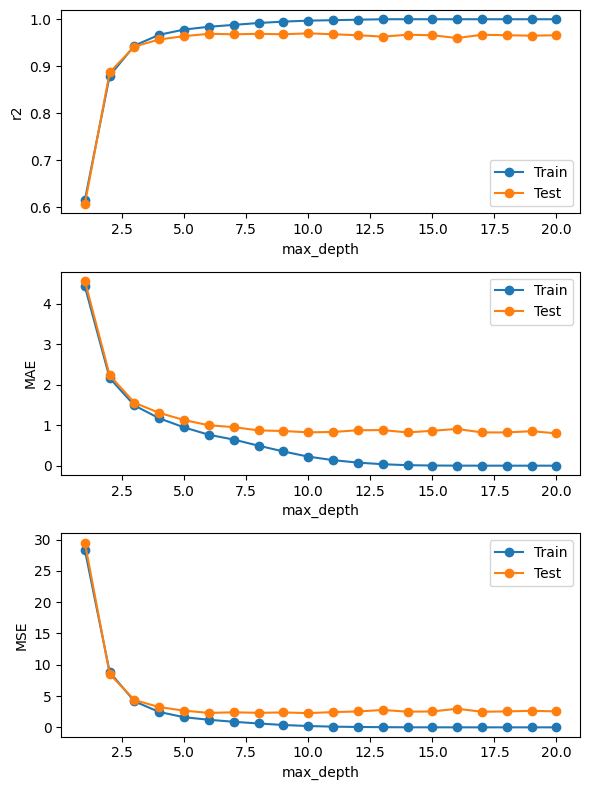

In [ ]:
# Grafica con los valores del train y test para cada uno de los arboles de decision según la profundidad en funcion de r2, MAE y MSE

# Crear una figura y ejes de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Primer subplot: r2
axs[0].plot(values, train_scores_r2, '-o', label='Train')
axs[0].plot(values, test_scores_r2, '-o', label='Test')
axs[0].set_xlabel("max_depth")
axs[0].set_ylabel("r2")
axs[0].legend()

# Segundo subplot: MAE
axs[1].plot(values, train_scores_mae, '-o', label='Train')
axs[1].plot(values, test_scores_mae, '-o', label='Test')
axs[1].set_xlabel("max_depth")
axs[1].set_ylabel("MAE")
axs[1].legend()

# Tercer subplot: MSE
axs[2].plot(values, train_scores_mse, '-o', label='Train')
axs[2].plot(values, test_scores_mse, '-o', label='Test')
axs[2].set_xlabel("max_depth")
axs[2].set_ylabel("MSE")
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Lo que vemos es que a partir de valores entorno a max_depth= 6 los resultados no mejoran en el conjunto de test, por lo que valores mayores no suponen un mejor modelo de decisionTreeRegressor.

Analicemos ahora el parámetro ``min_samples_split``.

In [ ]:
#Decision tree Regressor según min_samples_split

from sklearn.tree import DecisionTreeRegressor
#R2, MAE y MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


train_scores_r2, test_scores_r2 = [],[]
train_scores_mae, test_scores_mae = [],[]
train_scores_mse, test_scores_mse = [],[]

# Valores del parametro max_depth
values = [i for i in range(2, 21)]

accuracies = np.zeros(len(values))
cont = 0
# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = DecisionTreeRegressor(max_depth=6, min_samples_split=i)

	# fit model
	model.fit(x_train, y_train)

	# evaluate on the train dataset
	train_predict = model.predict(x_train)
 	#R2
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores_r2.append(train_r2)
 	#MAE
	train_mae = round(mean_absolute_error(y_train,train_predict),3)
	train_scores_mae.append(train_mae)
	#MSE
	train_mse = round(mean_squared_error(y_train,train_predict),3)
	train_scores_mse.append(train_mse)

	# evaluate on the test dataset
	test_predict = model.predict(x_test)
 	#R2
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores_r2.append(test_r2)
 	#MAE
	test_mae = round(mean_absolute_error(y_test, test_predict),3)
	test_scores_mae.append(test_mae)
	#MSE
	test_mse = round(mean_squared_error(y_test,test_predict),3)
	test_scores_mse.append(test_mse)
  #Accuracy
	accuracies[cont] = model.score(x_test,y_test)
	cont += 1

best_accuracies[1] = accuracies.max()

print('Best min_samples_split r2: ', test_scores_r2.index(max(test_scores_r2))+2)
print('R2 score: ', max(test_scores_r2))
print('Best min_samples_split MAE: ', test_scores_mae.index(min(test_scores_mae))+2)
print('MAE socre: ', min(test_scores_mae))
print('Best min_samples_split MSE: ', test_scores_mse.index(min(test_scores_mse))+2)
print('MSE score: ', min(test_scores_mse))
print('Best min_samples_split accuracy: ', accuracies.argmax() + 2)
print('Accuracy score: ', accuracies.max())

Best min_samples_split r2:  2
R2 score:  0.972
Best min_samples_split MAE:  2
MAE socre:  0.981
Best min_samples_split MSE:  2
MSE score:  2.133
Best min_samples_split accuracy:  2
Accuracy score:  0.9716222998570498


Para ``min_samples_split`` tenemos que el mejor valor es 6 para las métricas R^2 y MAE, y para MSE y el accuracy su valor óptimo es de 12.

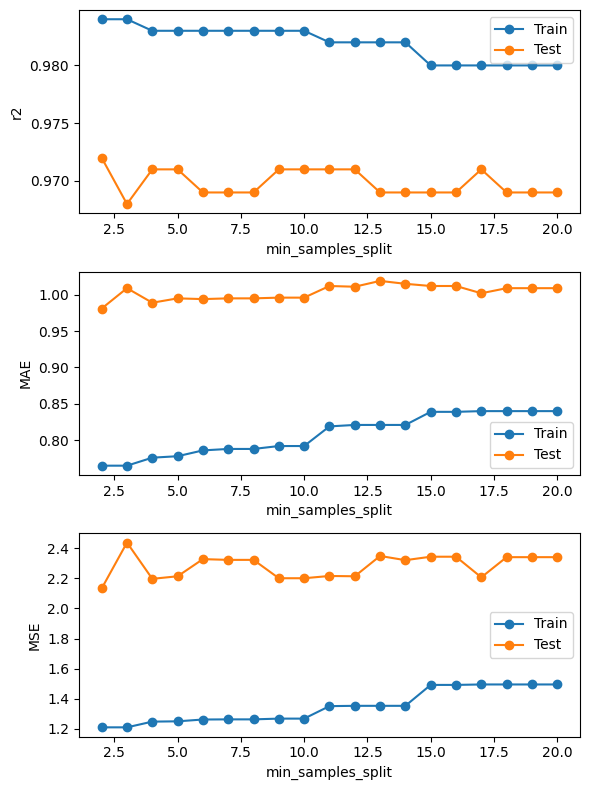

In [ ]:
# Grafica con los valores del train y test para cada uno de los arboles de decision según nº muestras mínimas para dividir en funcion de r2, MAE y MSE

# Crear una figura y ejes de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Primer subplot: r2
axs[0].plot(values, train_scores_r2, '-o', label='Train')
axs[0].plot(values, test_scores_r2, '-o', label='Test')
axs[0].set_xlabel("min_samples_split")
axs[0].set_ylabel("r2")
axs[0].legend()

# Segundo subplot: MAE
axs[1].plot(values, train_scores_mae, '-o', label='Train')
axs[1].plot(values, test_scores_mae, '-o', label='Test')
axs[1].set_xlabel("min_samples_split")
axs[1].set_ylabel("MAE")
axs[1].legend()

# Tercer subplot: MSE
axs[2].plot(values, train_scores_mse, '-o', label='Train')
axs[2].plot(values, test_scores_mse, '-o', label='Test')
axs[2].set_xlabel("min_samples_split")
axs[2].set_ylabel("MSE")
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

En las gráficas observamos que a partir ``min_samples_split=6`` las métricas rondan sus mejores valores, por tanto podemos tomar este como su valor óptimo.

Veamos ahora para el parámetro ``min_samples_leaf``.

In [ ]:
#Decision tree Regressor según min_samples_leaf

from sklearn.tree import DecisionTreeRegressor
#R2, MAE y MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


train_scores_r2, test_scores_r2 = [],[]
train_scores_mae, test_scores_mae = [],[]
train_scores_mse, test_scores_mse = [],[]

# Valores del parametro max_depth
values = [i for i in range(2, 21)]

accuracies = np.zeros(len(values))
cont = 0
# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=i)

	# fit model
	model.fit(x_train, y_train)

	# evaluate on the train dataset
	train_predict = model.predict(x_train)
 	#R2
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores_r2.append(train_r2)
 	#MAE
	train_mae = round(mean_absolute_error(y_train,train_predict),3)
	train_scores_mae.append(train_mae)
	#MSE
	train_mse = round(mean_squared_error(y_train,train_predict),3)
	train_scores_mse.append(train_mse)

	# evaluate on the test dataset
	test_predict = model.predict(x_test)
 	#R2
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores_r2.append(test_r2)
 	#MAE
	test_mae = round(mean_absolute_error(y_test, test_predict),3)
	test_scores_mae.append(test_mae)
	#MSE
	test_mse = round(mean_squared_error(y_test,test_predict),3)
	test_scores_mse.append(test_mse)
  #Accuracy
	accuracies[cont] = model.score(x_test,y_test)
	cont += 1

best_accuracies[2] = accuracies.max()

print('Best min_samples_leaf r2: ', test_scores_r2.index(max(test_scores_r2))+2)
print('R2 score: ', max(test_scores_r2))
print('Best min_samples_leaf MAE: ', test_scores_mae.index(min(test_scores_mae))+2)
print('MAE socre: ', min(test_scores_mae))
print('Best min_samples_leaf MSE: ', test_scores_mse.index(min(test_scores_mse))+2)
print('MSE score: ', min(test_scores_mse))
print('Best min_samples_leaf accuracy: ', accuracies.argmax() + 2)
print('Accuracy score: ', accuracies.max())

Best min_samples_leaf r2:  2
R2 score:  0.97
Best min_samples_leaf MAE:  3
MAE socre:  0.995
Best min_samples_leaf MSE:  4
MSE score:  2.254
Best min_samples_leaf accuracy:  4
Accuracy score:  0.970011111988801


Las cuatro métricas coinciden en que su valor óptimo para el número mínimo de muestras por hoja debe ser 3.

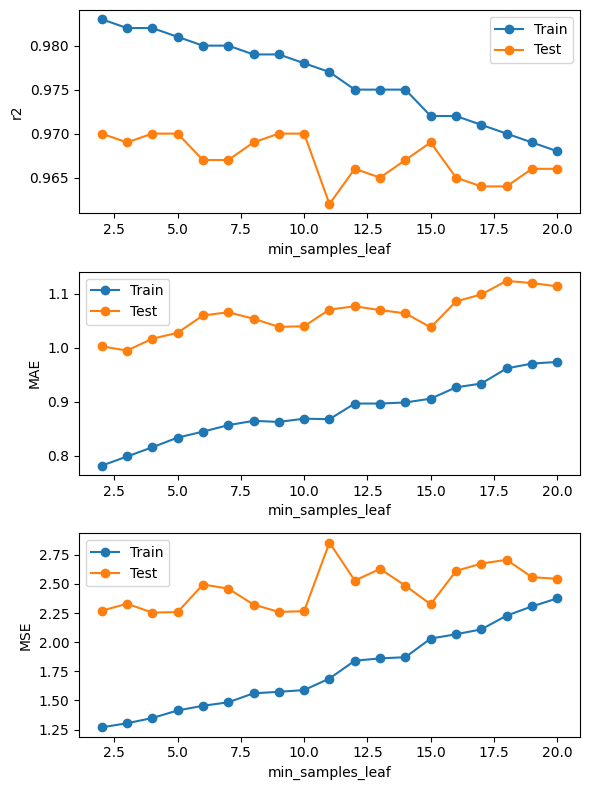

In [ ]:
# Grafica con los valores del train y test para cada uno de los arboles de decision según nº muestras mínimas en una hoja en funcion de r2, MAE y MSE

# Crear una figura y ejes de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Primer subplot: r2
axs[0].plot(values, train_scores_r2, '-o', label='Train')
axs[0].plot(values, test_scores_r2, '-o', label='Test')
axs[0].set_xlabel("min_samples_leaf")
axs[0].set_ylabel("r2")
axs[0].legend()

# Segundo subplot: MAE
axs[1].plot(values, train_scores_mae, '-o', label='Train')
axs[1].plot(values, test_scores_mae, '-o', label='Test')
axs[1].set_xlabel("min_samples_leaf")
axs[1].set_ylabel("MAE")
axs[1].legend()

# Tercer subplot: MSE
axs[2].plot(values, train_scores_mse, '-o', label='Train')
axs[2].plot(values, test_scores_mse, '-o', label='Test')
axs[2].set_xlabel("min_samples_leaf")
axs[2].set_ylabel("MSE")
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Las gráficas refuerzan que el valor óptimo para este parámetro debe ser 3, pues si aumentamos este valor empeora la predicción.

#### KNeighbors Regressor

Para este regresor vamos a estudiar el número de vecinos óptimos, iterando sobre el parámetro ``n_neighbors`` desde 2 hasta 20.

In [ ]:
#KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#R2, MAE y MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

train_scores = []
test_scores = []
train_scores_r2, test_scores_r2 = [],[]
train_scores_mae, test_scores_mae = [],[]
train_scores_mse, test_scores_mse = [],[]

# Valores del parametro max_depth
values = [i for i in range(2, 21)]

accuracies = np.zeros(len(values))
cont = 0
# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = KNeighborsRegressor(n_neighbors=i)

	# fit model
	model.fit(x_train, y_train)

	# evaluate on the train dataset
	train_predict = model.predict(x_train)
	#R2
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores_r2.append(train_r2)
 	#MAE
	train_mae = round(mean_absolute_error(y_train,train_predict),3)
	train_scores_mae.append(train_mae)
	#MSE
	train_mse = round(mean_squared_error(y_train,train_predict),3)
	train_scores_mse.append(train_mse)

	# evaluate on the test dataset
	test_predict = model.predict(x_test)
	#R2
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores_r2.append(test_r2)
 	#MAE
	test_mae = round(mean_absolute_error(y_test, test_predict),3)
	test_scores_mae.append(test_mae)
	#MSE
	test_mse = round(mean_squared_error(y_test,test_predict),3)
	test_scores_mse.append(test_mse)
	#Accuracy
	accuracies[cont] = model.score(x_test,y_test)
	cont += 1

best_accuracies[3] = accuracies.max()

print('Best n_neighbors r2: ', test_scores_r2.index(max(test_scores_r2))+2)
print('R2 score: ', max(test_scores_r2))
print('Best n_neighbors MAE: ', test_scores_mae.index(min(test_scores_mae))+2)
print('MAE socre: ', min(test_scores_mae))
print('Best n_neighbors MSE: ', test_scores_mse.index(min(test_scores_mse))+2)
print('MSE score: ', min(test_scores_mse))
print('Best n_neighbors accuracy: ', accuracies.argmax() + 2)
print('Accuracy score: ', accuracies.max())

Best n_neighbors r2:  2
R2 score:  0.949
Best n_neighbors MAE:  2
MAE socre:  1.227
Best n_neighbors MSE:  2
MSE score:  3.82
Best n_neighbors accuracy:  2
Accuracy score:  0.9491840162582812


Todas las métricas coinciden en que el número de vecinos debe ser 2. Si nos fijamos en el score obtenido vemos que es ligeramente peor que los que se tiene para el modelo del árbol de decisión.

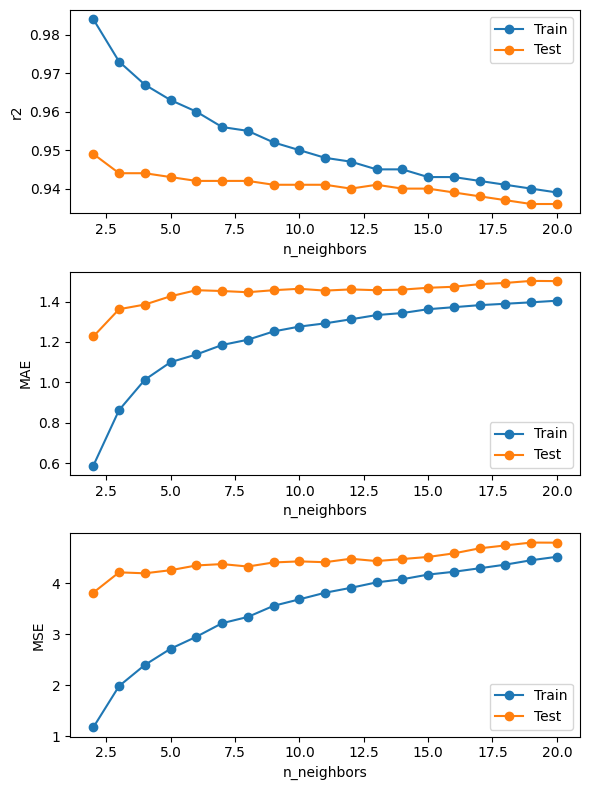

In [ ]:
# Grafica con los valores del train y test para cada uno de los KNeighbors según nº de vecinos en funcion de r2, MAE y MSE

# Crear una figura y ejes de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Primer subplot: r2
axs[0].plot(values, train_scores_r2, '-o', label='Train')
axs[0].plot(values, test_scores_r2, '-o', label='Test')
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("r2")
axs[0].legend()

# Segundo subplot: MAE
axs[1].plot(values, train_scores_mae, '-o', label='Train')
axs[1].plot(values, test_scores_mae, '-o', label='Test')
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("MAE")
axs[1].legend()

# Tercer subplot: MSE
axs[2].plot(values, train_scores_mse, '-o', label='Train')
axs[2].plot(values, test_scores_mse, '-o', label='Test')
axs[2].set_xlabel("n_neighbors")
axs[2].set_ylabel("MSE")
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Con las gráficas vemos que para el conjunto de test los resultados empeoran conforme aumentamos el número de vecinos.

#### SVR

Con el modelo SVR analizamos el tipo de kernel que beneficia a esta regresión, probamos tres tipos variando el parámetro ``kernel`` como "linear", "poly" y "rbf".

In [ ]:
#SVR

from sklearn.svm import SVR
#R2, MAE y MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


train_scores_r2, test_scores_r2 = [],[]
train_scores_mae, test_scores_mae = [],[]
train_scores_mse, test_scores_mse = [],[]

# Valores del parametro max_depth
values = ['linear', 'poly', 'rbf']

accuracies = np.zeros(len(values))
cont = 0
# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = SVR(C=1.0, epsilon=0.2, kernel=i)

	# fit model
	model.fit(x_train, y_train)

	# evaluate on the train dataset
	train_predict = model.predict(x_train)
	#R2
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores_r2.append(train_r2)
 	#MAE
	train_mae = round(mean_absolute_error(y_train,train_predict),3)
	train_scores_mae.append(train_mae)
	#MSE
	train_mse = round(mean_squared_error(y_train,train_predict),3)
	train_scores_mse.append(train_mse)

	# evaluate on the test dataset
	test_predict = model.predict(x_test)
	#R2
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores_r2.append(test_r2)
 	#MAE
	test_mae = round(mean_absolute_error(y_test, test_predict),3)
	test_scores_mae.append(test_mae)
	#MSE
	test_mse = round(mean_squared_error(y_test,test_predict),3)
	test_scores_mse.append(test_mse)
	#Accuracy
	accuracies[cont] = model.score(x_test,y_test)
	cont += 1

best_accuracies[4] = accuracies.max()

print('Best kernel r2: ', values[test_scores_r2.index(max(test_scores_r2))])
print('R2 score: ', max(test_scores_r2))
print('Best kernel MAE: ', values[test_scores_mae.index(min(test_scores_mae))])
print('MAE socre: ', min(test_scores_mae))
print('Best kernel MSE: ', values[test_scores_mse.index(min(test_scores_mse))])
print('MSE score: ', min(test_scores_mse))
print('Best kernel accuracy: ', values[accuracies.argmax()])
print('Accuracy score: ', accuracies.max())

Best kernel r2:  rbf
R2 score:  0.925
Best kernel MAE:  rbf
MAE socre:  1.682
Best kernel MSE:  rbf
MSE score:  5.602
Best kernel accuracy:  rbf
Accuracy score:  0.9254804367496317


El tipo de kernel que funciona mejor teniendo en cuenta las diferentes métricas es el rbf.

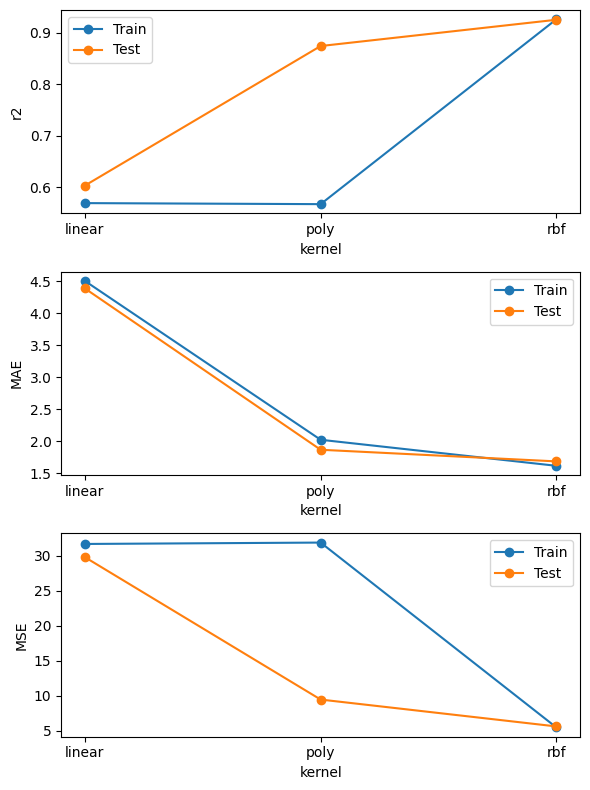

In [ ]:
# Grafica con los valores del train y test para cada uno de los SVC según el kernel en funcion de r2, MAE y MSE

# Crear una figura y ejes de subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Primer subplot: r2
axs[0].plot(values, train_scores_r2, '-o', label='Train')
axs[0].plot(values, test_scores_r2, '-o', label='Test')
axs[0].set_xlabel("kernel")
axs[0].set_ylabel("r2")
axs[0].legend()

# Segundo subplot: MAE
axs[1].plot(values, train_scores_mae, '-o', label='Train')
axs[1].plot(values, test_scores_mae, '-o', label='Test')
axs[1].set_xlabel("kernel")
axs[1].set_ylabel("MAE")
axs[1].legend()

# Tercer subplot: MSE
axs[2].plot(values, train_scores_mse, '-o', label='Train')
axs[2].plot(values, test_scores_mse, '-o', label='Test')
axs[2].set_xlabel("kernel")
axs[2].set_ylabel("MSE")
axs[2].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Para el kernel lineal se obtiene el peor resultado, para el polinomial mejora las predicciones acercándose a los resultados para el rbf que resulta ser el mejor para todas.

Analicemos los accuracy obtenidos para la mejor versión de cada modelo que se recogen en la siguiente tabla.

In [ ]:
df = pd.DataFrame({'Accuracy': best_accuracies}, index=modelos)
df

,Accuracy
Decision Tree 1,0.969782
Decision Tree 2,0.971622
Decision Tree 3,0.970011
KNeighbors,0.949184
SVR,0.925480


Las mejores predicciones son las obtenidas con los árboles de precisión, muy similares entre ellas. El siguiente mejor regresor es el KNeighbors rozando el 95% y por último tenemos al SVR con un 92%. Todos ellos con procentajes altos, por lo que todos son capaces de predecir de buena manera las subcategorías del tipo espectral. Si tenemos que elegir uno de ellos escogeremos un árbol de decisión ya que es el que más se acerca al 100% de accuracy.

## **Conclusiones**

* El dataset con el que hemos trabajado lo hemos tenido que adecuar al problema que queremos solucionar. Para ello hemos escogido las columnas que necesitamos y hemos hecho algunas modificaciones, como la división del tipo espectral. También hemos eliminado los nulos, y esto ha supuesto disminuir el número de instancias, sin embargo han sido suficientes para el análisis.

* La primera técnica que hemos utilizado ha sido la clasificación empleando diferentes clasificadores, analizando los resultados obtenidos y comparándolos para escoger el que mejor se ajusta a este conjunto de datos. El elegido para este problema de clasificación es un árbol de decisión determinando la profundidad del árbol y sin necesidad de escalar los datos, pues hemos visto que no afecta a este modelo.

* La segunda técnica empleada ha sido regresión para predecir la subcategoría del tipo espectral. De nuevo hemos probado varios modelos y estudiado algunos de los parámetros para encontrar los óptimos. El árbol de decisión con una profundidad de 7 niveles, 6 muestras mínimas para dividir un nodo interno en dos nodos hijos  y 3 muestras mínimas por nodo hoja ha resultado ser el mejor modelo para esta predicción.
